<a href="https://www.kaggle.com/code/ahmedmagdy2809/water-quality-and-sewage-system-eda?scriptVersionId=210453302" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# EDA Project Roadmap
## 1. Introduction of the dataset and aim of the EDA
    1. Dataset Introduction
    2. Aim of the EDA
## 2. Libraries setup and reading the data
    1. pandas for data processing
    2. numpy for mathematical operations
    3. matplotlib.plotly, seaborn & plotly.express for data vizualisations (instead of tableau)
## 3. get an overview and deep review of the data.
    1. using info & describe functions
    2. using head & tail functions to view the data
## 4. Handling missing values and Data Structuring
    1. Managing columns (Create, drop and rename)
    2. changing the datatypes of the columns
    3. using isull.sum # Count missing values per column
    4. using heatmap sns.heatmap(data.isnull(), cbar=False)  # Visualize missing data
    5. fill or drop missing values according to the dataset and logic.
    6. check for outliets using sns.boxplot(x=data['column_name']) for numerical columns.
## 5. Analysis and vizualisation of the data
    1. using seaborn and matplotlib to provide detailed vizulaisations
## 6. provide insights from vizualisations
    1. prepare a summery report including the insights.

# 1. **Introduction of the dataset and aim of the EDA**
<img src = 'https://www.deq.ok.gov/wp-content/uploads/deqmainresources/water-div-slider.jpg'></img>
    
## 1. **Dataset Introduction**

This datasets includes being analyzed is shared to raise awareness and improve environmental policies, aimed to analyze water quality and sewage systems in the USA. It analyzes data collected from different places to find trends and challenges in water and sewage management. It includes **40,000+ records and 6 features**. Key variables in the dataset include **'Geographical Location'** **'Nitrogen (mg/L)'**, **'Sampling Date'**, **'Nitrogen (mg/L)'**, **'Phosphorus (mg/L)'**, and **'State of Sewage System'**.n
### Key Features:
- **Geographical Location**: divided into two columns (longitude and latitude).
- **Sampling Date**: dates when water samples were collected, helping to track changes over time..
- **Nitrogen (mg/L)**: concentration of nitrogen in the water samples, measured in milligrams per liter (mg/L).
- **Phosphorus (mg/L)**: concentration of phosphorus in the water samples, also measured in mg/L. Like nitrogen.
- **State of Sewage System**:  the condition of the sewage system in the area where the sample was taken.t
## 2. **Aim of the EDA**
The primary aim of this **Exploratory Data Analysis (EDA)** is to explore the dataset and uncover patterns. Specifically, we will:
1. Analyze the distribution of key variables (e.g., Nitrogen (mg/L), Phosphorus (mg/L)).
2. Identify missing values and handle them.
3. Investigate relationships between variables, such as the correlation between **Geographical Location** and **concentrationt**.
4. Detect any outliers or unusual patterns in different geographical locations.

The insights from this EDA will help guide future modeling..cing restaurant success.

In [1]:
#Missingno helps you identify, visualize, and understand missing data patterns in your dataset, enabling you to make informed decisions about how to handle missing values during preprocessing.
!pip install missingno

In [2]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load Base libraries
import geopandas as gpd
from shapely.geometry import Point
import time
# #Function: Provides time-related functions, like time.sleep() for pausing execution, time.time() for getting the current time in seconds, and various ways to measure time intervals.
# When to Keep: Useful if you're timing certain processes (e.g., performance analysis).
# Can Disregard?: If you're not measuring execution time or working with time-related functionality in your analysis, you can safely omit it.

#import datetime
# Function: Provides classes for manipulating dates and times, such as datetime.datetime and datetime.timedelta. You can easily perform operations like adding days to a date or comparing two timestamps.
# When to Keep: If your data involves timestamps or you need to perform date/time manipulations, keep this.
# Can Disregard?: If you don't need to work with dates or times explicitly, you can disregard it.

#import os
# Function: Allows interaction with the operating system, such as navigating file directories, checking for files, or working with environment variables.
# When to Keep: If your workflow requires file management (reading/writing files, checking file paths), you should keep this.
# Can Disregard?: If you don't need to interact with the filesystem, you can discard this.

# Scientific libraries
import numpy as np
# Function: Core scientific computing library in Python. Provides support for large multi-dimensional arrays and matrices, along with a variety of mathematical functions to operate on them.
# When to Keep: Essential for numerical operations, array manipulation, statistical calculations, etc.
# Can Disregard?: It’s unlikely you’ll discard this unless you're working with data in only Pandas DataFrames and don’t need arrays or advanced math operations.

import pandas as pd
# Function: Provides data structures like DataFrame and Series for data manipulation, especially useful for handling structured data (e.g., CSVs, databases).
# When to Keep: Critical for most EDA tasks. Essential for handling tabular data, cleaning, and analyzing it.
# Can Disregard?: Rarely will you discard this, unless you’re not working with structured data (e.g., JSON, XML) and you use only basic Python data structures.

#from empiricaldist import Cdf, Pmf
# Function: Provides tools for working with empirical distributions. Cdf is the cumulative distribution function, and Pmf is the probability mass function, both useful for visualizing and analyzing data distributions.
# When to Keep: Keep if you're working with empirical distributions and need advanced plotting/analysis of how data is distributed (e.g., histogram analysis, KDEs).
# Can Disregard?: If you don’t need to perform statistical distribution analysis or advanced visualizations, you can discard this.

# Visual libraries
import matplotlib.pyplot as plt
# Function: The core library for creating static, animated, and interactive visualizations in Python.
# When to Keep: Essential for basic plotting (line plots, bar plots, histograms).
# Can Disregard?: Unlikely to discard if you need any form of visualizations, but if you prefer using Seaborn or other libraries exclusively, you might omit this (though Seaborn internally uses Matplotlib).

#from matplotlib import rcParams
# Function: Allows you to customize the default settings of Matplotlib plots, such as figure size, font size, axis labels, etc.
# When to Keep: Useful for setting global style preferences and improving plot readability. Essential for customizing the appearance of your visualizations.
# Can Disregard?: If you're fine with default Matplotlib settings and don’t need advanced plot customizations, you can skip this.

import seaborn as sns
# Function: A high-level interface for creating attractive statistical plots built on top of Matplotlib. It’s especially great for visualizing relationships between variables, distributions, and categorical data.
# When to Keep: Highly recommended for creating aesthetic and informative plots. It's much easier to use than raw Matplotlib for many common plot types.
# Can Disregard?: Only if you prefer using other visualization libraries (e.g., Plotly, or Matplotlib only), but Seaborn is generally a good choice for EDA.

import missingno as msno  # Visualize missing values
# Function: A specialized library for visualizing missing data. It helps you quickly assess patterns and relationships of missingness in your dataset.
# When to Keep: Extremely useful during EDA if your data has missing values. It simplifies the process of understanding and visualizing missing data.
# Can Disregard?: If you don’t have missing data or plan to handle it using other methods, you might not need this.

# Helper libraries
#from tqdm.notebook import tqdm, trange
# Function: Provides progress bars for loops in Jupyter notebooks, making it easier to track long-running computations.
# When to Keep: Useful if you're performing long-running tasks like data processing or training machine learning models.
# Can Disregard?: If your workflow doesn’t involve long-running tasks or you don’t need progress bars, you can discard this.

#from colorama import Fore, Back, Style
# Function: Provides cross-platform support for colored terminal text output (useful for adding color to print statements in the terminal).
# When to Keep: Useful if you want to style terminal outputs for better readability (e.g., for debugging or logging).
# Can Disregard?: If you don't need colored text output in the terminal, you can omit this.

import warnings
warnings.filterwarnings('ignore')
# Function: Used to manage warnings. warnings.filterwarnings('ignore') suppresses warnings, often used in notebooks or scripts to keep output clean.
# When to Keep: Useful if you want to suppress non-critical warnings during your analysis (for example, ignoring warnings about deprecated functions).
# Can Disregard?: If you prefer to see warnings or don't mind them, you can omit this.

# Visual setup
#import matplotlib.ticker as ticker
# Function: Provides tools for customizing the tick marks and labels of Matplotlib plots (e.g., controlling the appearance of axis labels and tick intervals).
# When to Keep: Useful for advanced control over tick marks (e.g., making ticks more readable or changing their frequency).
# Can Disregard?: If you're okay with the default tick settings in your plots, you can omit this.

#plt.style.use('ggplot')
# Function: Applies the ggplot2 style (a popular R plotting style) to Matplotlib plots, giving them a more polished, aesthetically-pleasing appearance.
# When to Keep: Useful for improving the visual style of your plots without needing to manually adjust settings.
# Can Disregard?: If you don’t need this specific style or are happy with the default Matplotlib style, you can skip it.

# rcParams['axes.spines.right'] = False
# rcParams['axes.spines.top'] = False
# rcParams['figure.figsize'] = [12, 9]
# rcParams['font.size'] = 16
# plt.rc('xtick', labelsize=12)
# plt.rc('ytick', labelsize=12)
# Function: These commands customize global settings for Matplotlib to control figure size, font size, and axes spines.
# When to Keep: Essential if you want specific control over the appearance of all plots.
# Can Disregard?: If you don't need specific customizations, you can omit them.

# custom_colors = ['#74a09e','#86c1b2','#98e2c6','#f3c969','#f2a553', '#d96548', '#c14953']
# sns.set_palette(custom_colors)
# %config InlineBackend.figure_format = 'retina'
# %config Completer.use_jedi = False
# Function: Sets the color palette for Seaborn plots.
# When to Keep: If you want to set a custom color palette to maintain consistency in your plots.
# Can Disregard?: If you're fine with the default Seaborn palette, you can omit this.

# Pandas options
#pd.set_option('max_colwidth', 40)
# Function: Sets the maximum column width in Pandas DataFrame display (helpful for wide text fields).
# When to Keep: Useful when displaying large text columns (e.g., in Jupyter Notebooks).
# Can Disregard?: If you're not displaying wide columns or are fine with the default settings, you can omit this.

pd.options.display.max_columns = None  # Possible to limit
# Function: Allows displaying all columns in a Pandas DataFrame.
# When to Keep: Useful when you want to see all columns, especially in large DataFrames.
# Can Disregard?: If you're okay with limiting the number of columns displayed, you can omit this.

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = 'all'
# Function: Controls the interactive shell behavior, such as enabling the display of all output from the last expression in a cell (for Jupyter).
# When to Keep: Useful in Jupyter Notebooks if you want all expressions in a cell to be printed (not just the last one).
# Can Disregard?: If you're not using Jupyter or don’t need this behavior, you can omit it.

# Seed value for numpy.random
np.random.seed(42)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-quality-and-sewage-system-dataset/503722b3dfc0a9012d787d07340fd309eb648a9f96c9017656a167f76eb7b209.csv


In [4]:
#Reading the data
df_raw = pd.read_csv('/kaggle/input/water-quality-and-sewage-system-dataset/503722b3dfc0a9012d787d07340fd309eb648a9f96c9017656a167f76eb7b209.csv')

# 3. **get an overview and deep review of the data.**

In [5]:
df_raw.head()
#the dataset contains 6 columns, each column should be renamed accordingly (eg. state_of_sewage_system).

,Geographical Location (Latitude),Geographical Location (Longitude),Sampling Date,Nitrogen (mg/L),Phosphorus (mg/L),State of Sewage System
0,5.201086,-55.029673,2022-06-10,7.181860,2.320506,Good
1,-64.196408,94.483268,2018-10-12,9.735685,1.015308,Good
2,-7.892940,-90.503109,2023-02-16,6.778074,4.718452,Good
3,-11.334248,110.778986,2021-10-17,3.340601,3.315705,Moderate
4,-24.532061,-147.588402,2021-12-01,8.753211,4.682091,Good


In [6]:
df_raw.info()
# the data set includes 40080 rows
# no null values were found in the dataset
# sampling date to be changed to datetime format and split to year, month, day, quarter for analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40080 entries, 0 to 40079
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Geographical Location (Latitude)   40080 non-null  float64
 1   Geographical Location (Longitude)  40080 non-null  float64
 2   Sampling Date                      40080 non-null  object 
 3   Nitrogen (mg/L)                    40080 non-null  float64
 4   Phosphorus (mg/L)                  40080 non-null  float64
 5   State of Sewage System             40080 non-null  object 
dtypes: float64(4), object(2)
memory usage: 1.8+ MB


In [7]:
df_raw.describe()
# the concentration of the nitorgen/phosphorus will be the main focus in the dataset
# the below numerical values for location are not an indications

,Geographical Location (Latitude),Geographical Location (Longitude),Nitrogen (mg/L),Phosphorus (mg/L)
count,40080.000000,40080.000000,40080.000000,40080.000000
mean,0.171349,-0.626047,5.020690,2.499863
std,51.825410,104.848886,2.914000,1.439897
min,-89.954308,-179.971464,0.003381,0.000068
25%,-44.470584,-92.737203,2.469945,1.237920
50%,0.576327,-1.678289,5.013687,2.516371
75%,45.520516,91.033062,7.563102,3.757351
max,89.993523,179.985338,9.999745,4.999669


In [8]:
df_raw.isnull().sum()

Geographical Location (Latitude)     0
Geographical Location (Longitude)    0
Sampling Date                        0
Nitrogen (mg/L)                      0
Phosphorus (mg/L)                    0
State of Sewage System               0
dtype: int64

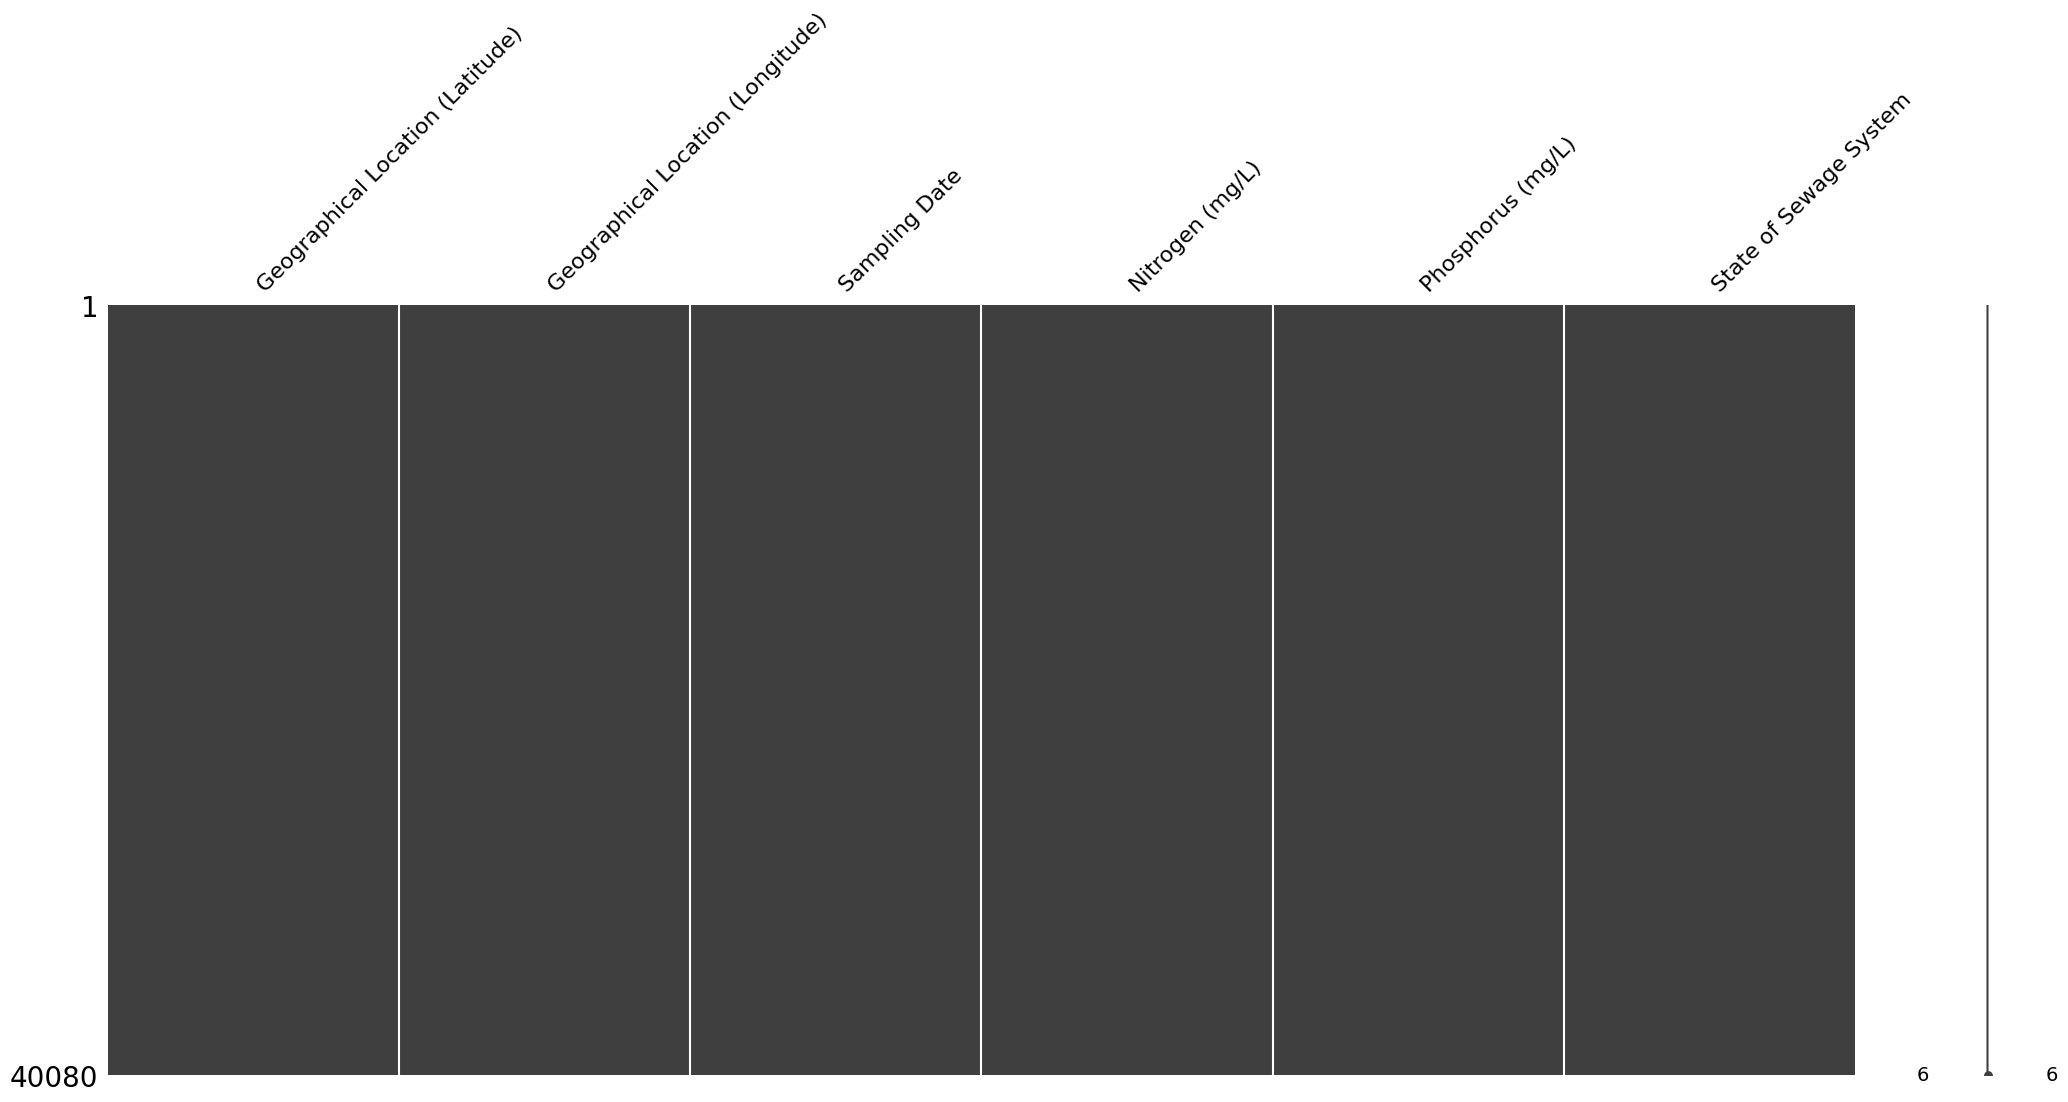

In [9]:
# visualize missing values (even though the data is already without nulls, i still do these steps for best practice and reproducable code)
msno.matrix(df_raw);

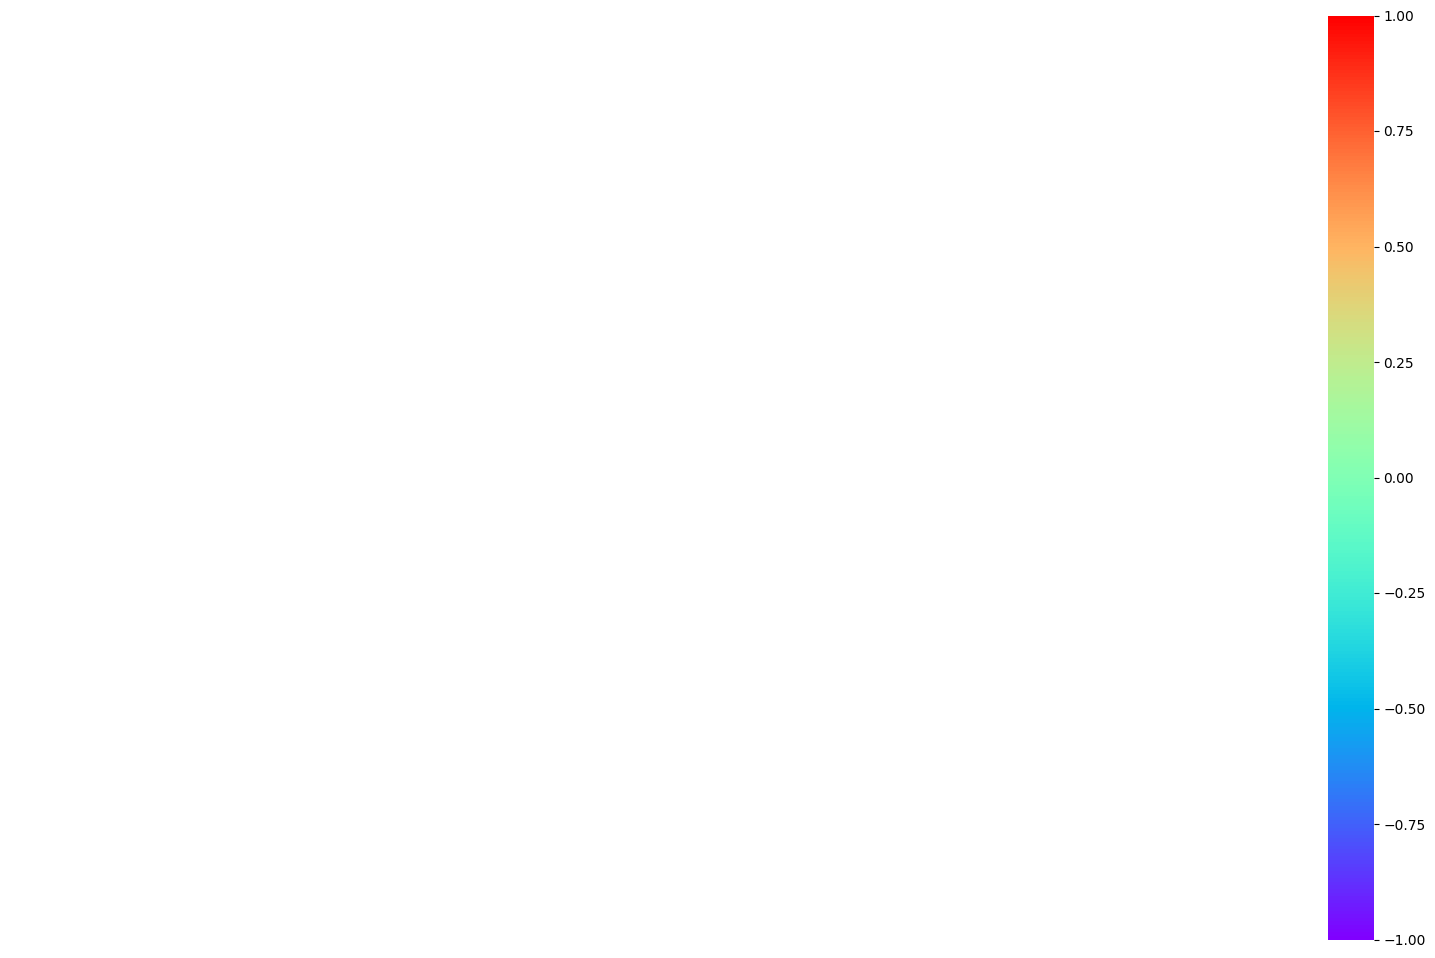

In [10]:
msno.heatmap(df_raw, cmap='rainbow');

In [11]:
df_raw.head()

,Geographical Location (Latitude),Geographical Location (Longitude),Sampling Date,Nitrogen (mg/L),Phosphorus (mg/L),State of Sewage System
0,5.201086,-55.029673,2022-06-10,7.181860,2.320506,Good
1,-64.196408,94.483268,2018-10-12,9.735685,1.015308,Good
2,-7.892940,-90.503109,2023-02-16,6.778074,4.718452,Good
3,-11.334248,110.778986,2021-10-17,3.340601,3.315705,Moderate
4,-24.532061,-147.588402,2021-12-01,8.753211,4.682091,Good


In [12]:
# Check for duplicates based on the combination of 'Column1' and 'Column2'
value_counts = df_raw.groupby(['Geographical Location (Latitude)', 'Geographical Location (Longitude)']).size()

print("Count of combinations of Column1 and Column2:")
print(value_counts)

Count of combinations of Column1 and Column2:
Geographical Location (Latitude)  Geographical Location (Longitude)
-89.954308                         68.823372                           4
-89.949039                        -140.174112                          4
-89.932472                        -171.070306                          4
-89.928328                        -45.837455                           4
-89.898766                         42.774684                           4
                                                                      ..
 89.947508                        -39.091622                           4
 89.962954                         41.032679                           4
 89.973950                         30.689024                           4
 89.991104                         136.778024                          4
 89.993523                        -115.617422                          4
Length: 10020, dtype: int64


### From the above, the below steps will be required to effectivley clean the data and prepare for further analysis
    1. change the column names to best practice
    2. check for extra white spaces and remove them
    3. the sampling date column dtype will be changed to datetime
    4. the sampling date column will be split to year, quarter, month and day for analysis.

## 4. Handling missing values and Data Structuring

### 4.1. Change column names to appropriate names.

In [13]:
df = df_raw.copy()

In [14]:
df.columns

Index(['Geographical Location (Latitude)', 'Geographical Location (Longitude)',
       'Sampling Date', 'Nitrogen (mg/L)', 'Phosphorus (mg/L)',
       'State of Sewage System'],
      dtype='object')

In [15]:
new_columns = {
    'Geographical Location (Latitude)':'latitude',
    'Geographical Location (Longitude)':'longitude',
    'Sampling Date':'sampling_date',
    'Nitrogen (mg/L)':'nitrogen_(mg/L)',
    'Phosphorus (mg/L)':'phosphorus_(mg/L)',
    'State of Sewage System':'state_of_sewage_system'
}

In [16]:
df.rename(columns = new_columns, inplace = True)

In [17]:
#check
df.columns

Index(['latitude', 'longitude', 'sampling_date', 'nitrogen_(mg/L)',
       'phosphorus_(mg/L)', 'state_of_sewage_system'],
      dtype='object')

### 4.2. Check for any extra white spaces and remove them

In [18]:
# Check for extra white spaces in the entire DataFrame
df.map(lambda x: isinstance(x, str) and x.strip() != x).any()
#This will return True for columns that have extra spaces.
#no white spaces are in the dataset
# we can check for white spaces in flat type by changing the dtype first to string for simplicity

latitude                  False
longitude                 False
sampling_date             False
nitrogen_(mg/L)           False
phosphorus_(mg/L)         False
state_of_sewage_system    False
dtype: bool

In [19]:
# great, in case there were extra white spaces, the following code can be applied.
# Strip leading and trailing spaces from all string columns
#df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

### 4.3. the sampling date column dtype will be changed to datetime

In [20]:
df['sampling_date'] = pd.to_datetime(df['sampling_date'])
df['sampling_date'].dtype

dtype('<M8[ns]')

In [21]:
df.dtypes

latitude                         float64
longitude                        float64
sampling_date             datetime64[ns]
nitrogen_(mg/L)                  float64
phosphorus_(mg/L)                float64
state_of_sewage_system            object
dtype: object

### 4.4. the sampling date column will be split to year, quarter, month and day for analysis.

In [22]:
df['sampling_year'] = df['sampling_date'].dt.year
df['sampling_quarter'] = df['sampling_date'].dt.quarter
df['sampling_month'] = df['sampling_date'].dt.strftime('%b')
df['sampling_day'] = df['sampling_date'].dt.strftime('%A')

In [23]:
df.head()

,latitude,longitude,sampling_date,nitrogen_(mg/L),phosphorus_(mg/L),state_of_sewage_system,sampling_year,sampling_quarter,sampling_month,sampling_day
0,5.201086,-55.029673,2022-06-10,7.181860,2.320506,Good,2022,2,Jun,Friday
1,-64.196408,94.483268,2018-10-12,9.735685,1.015308,Good,2018,4,Oct,Friday
2,-7.892940,-90.503109,2023-02-16,6.778074,4.718452,Good,2023,1,Feb,Thursday
3,-11.334248,110.778986,2021-10-17,3.340601,3.315705,Moderate,2021,4,Oct,Sunday
4,-24.532061,-147.588402,2021-12-01,8.753211,4.682091,Good,2021,4,Dec,Wednesday


## 5. Analysis and vizualisation of the data

### 5.1. Univariate Analysis
#### 5.1.1. plot value_counts for year.
#### 5.1.2. plot value_counts for quarter.
#### 5.1.3. plot value_counts for month.
#### 5.1.4. plot value_counts for day.
#### 5.1.5. plot value_counts for state_of_sewage_system.
#### 5.1.6. plot the distribution of nitrogen_(mg/L).
#### 5.1.7. plot the distribution of phosphorus_(mg/L).

### 5.2. Bivariate Analysis
#### 5.2.1. Relationship between nitrogen_(mg/L) and state_of_sewage_system.
#### 5.2.2. Relationship between phosphorus_(mg/L) and state_of_sewage_system.
#### 5.2.3. Relationship between nitrogen_(mg/L) and phosphorus_(mg/L).

### 5.3. Multivariate Analysis
#### 5.3.1. correlation between nitrogen_(mg/L) and phosphorus_(mg/L).
#### 5.3.2. nitrogen_(mg/L) Distribution by year, quarter, month and day.
#### 5.3.3. phosphorus_(mg/L) Distribution by year, quarter, month and day.age votes_count.

#### 5.1.1. plot value_counts for year.

In [24]:
unique_sampling_year = df['sampling_year'].value_counts().copy()
unique_sampling_year = unique_sampling_year.reset_index()
unique_sampling_year = unique_sampling_year.sort_values(by='sampling_year')
unique_sampling_year.columns = ['sampling_year', 'Count']

# plt.show()
#the data collected is almost the same among the years

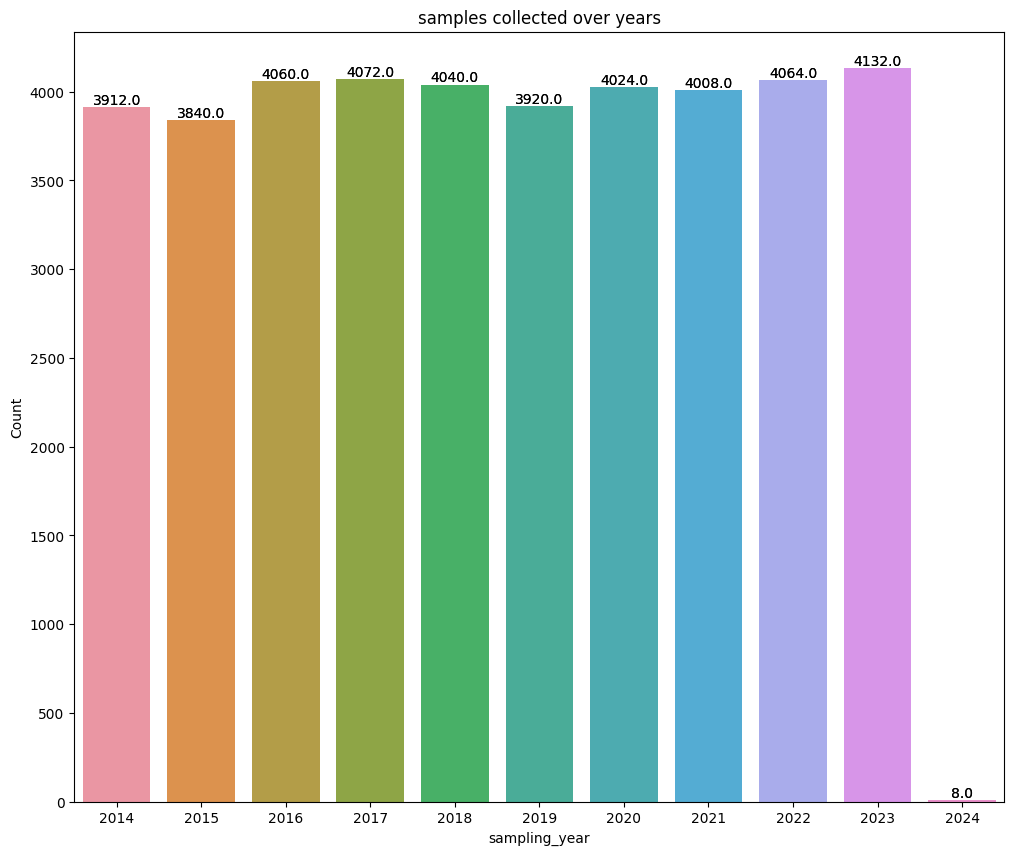

In [25]:
plt.figure(figsize=(12, 10))
sns_barplot = sns.barplot(data=unique_sampling_year, x='sampling_year', y='Count')
sns.barplot(data=unique_sampling_year, x='sampling_year', y='Count')
plt.title("samples collected over years")
 #plt.xticks(rotation=45)  # Rotate x-axis labels for readability if needed
 # Add labels
for bar in sns_barplot.patches:
    # Get the x position (left of the bar) and the height of the bar (Count)
    x_position = bar.get_x() + bar.get_width() / 2  # Position at the center of the bar
    y_position = bar.get_height()  # The height of the bar (the count value)
    
    # Add the label above the bar
    sns_barplot.text(x_position, y_position + 0.1,  # Position slightly above the bar
                     str(round(y_position, 2)), color='black', ha='center', va='bottom', fontsize=10)
# year 2024 should be removed from the analysis

#### 5.1.2. plot value_counts for quarter.

In [26]:
unique_sampling_quarter = df['sampling_quarter'].value_counts().copy()
unique_sampling_quarter = unique_sampling_quarter.reset_index()
unique_sampling_quarter = unique_sampling_quarter.sort_values(by='sampling_quarter')
unique_sampling_quarter.columns = ['sampling_quarter', 'Count']

# plt.show()
#the data collected is almost the same among the years

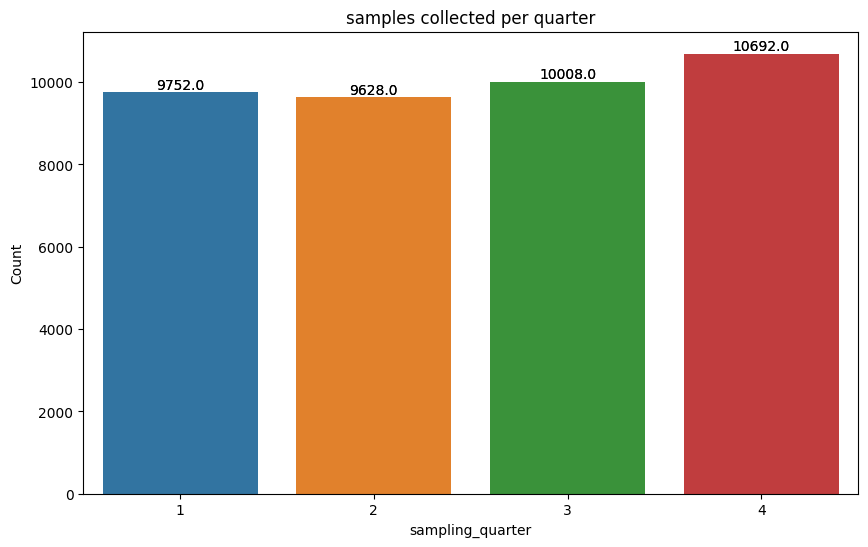

In [27]:
plt.figure(figsize = (10,6))
sns_barplot = sns.barplot(data=unique_sampling_quarter, x='sampling_quarter', y='Count')
sns.barplot(data=unique_sampling_quarter, x='sampling_quarter', y='Count')
plt.title("samples collected per quarter")
for bar in sns_barplot.patches:
    # Get the x position (left of the bar) and the height of the bar (Count)
    x_position = bar.get_x() + bar.get_width() / 2  # Position at the center of the bar
    y_position = bar.get_height()  # The height of the bar (the count value)
    
    # Add the label above the bar
    sns_barplot.text(x_position, y_position + 0.1,  # Position slightly above the bar
                     str(round(y_position, 2)), color='black', ha='center', va='bottom', fontsize=10)
plt.show()
#most of the samples are collected at the last quarter of the year
#consistent sampling will be better overall to ensure better analysis

#### 5.1.3. plot value_counts for month.

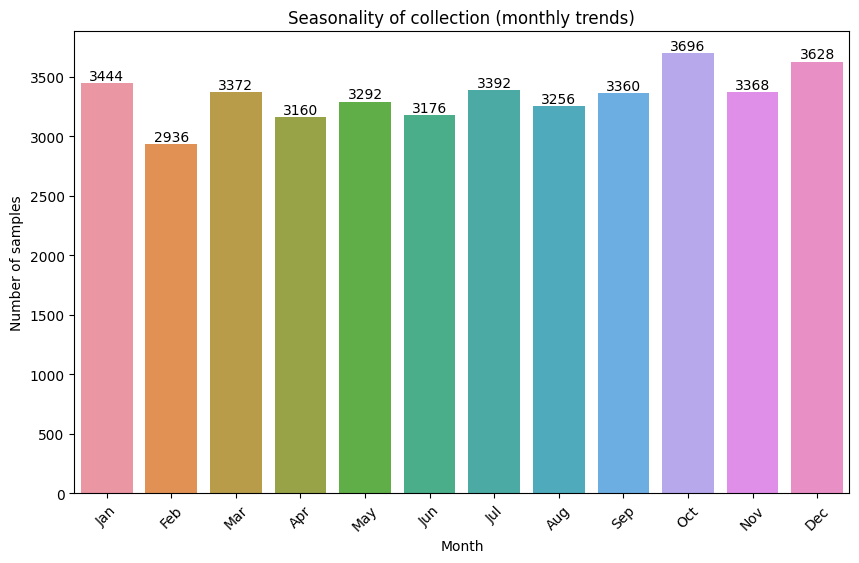

In [28]:

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='sampling_month', data=df, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Seasonality of collection (monthly trends)')
plt.xlabel('Month')
plt.ylabel('Number of samples')
for p in ax.patches:
    # Get the height of each bar (count value)
    height = p.get_height()
    
    # Place the label above the bar
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Position slightly above the bar
            str(int(height)), ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.show()
#the samples collection drop in month february and spikes in the last 3 months of the year

#### 5.1.4. plot value_counts for day.

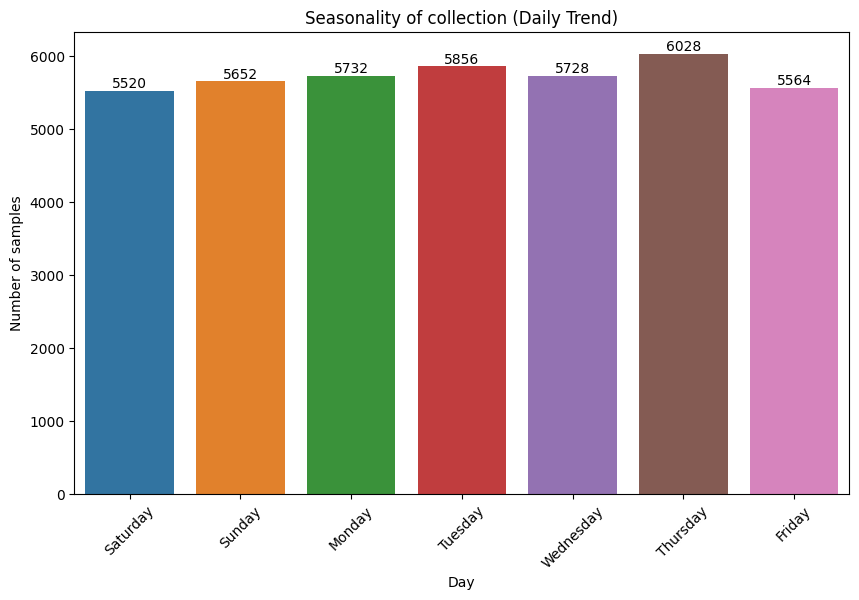

In [29]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='sampling_day', data=df, order=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Seasonality of collection (Daily Trend)')
plt.xlabel('Day')
plt.ylabel('Number of samples')
for p in ax.patches:
    # Get the height of each bar (count value)
    height = p.get_height()
    
    # Place the label above the bar
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Position slightly above the bar
            str(int(height)), ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.show()
# the samples are collected the most in thursday and least in saturday and friday

#### 5.1.5. plot value_counts for state_of_sewage_system.

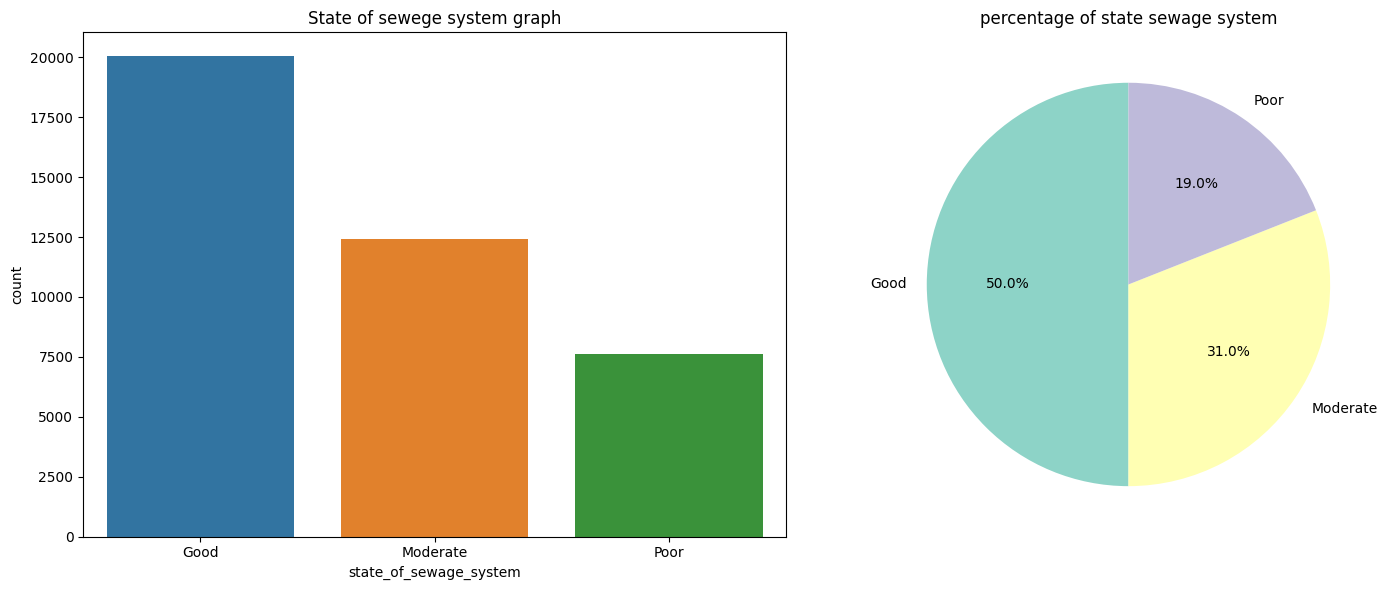

In [30]:
counts = df['state_of_sewage_system'].value_counts()

# Create the subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the countplot on the first axis (axes[0])
sns.countplot(data=df, x='state_of_sewage_system', ax=axes[0])
axes[0].set_title('State of sewege system graph')

# Plot the pie chart on the second axis (axes[1])
axes[1].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(counts)))
axes[1].set_title('percentage of state sewage system')

# Show the plot
plt.tight_layout()  # Adjusts layout to prevent overlap
plt.show()
#most of the sewage system states are good (50%) which is a good sign, and only a small size is poor (19%)

#### 5.1.6. plot the distribution of nitrogen_(mg/L).

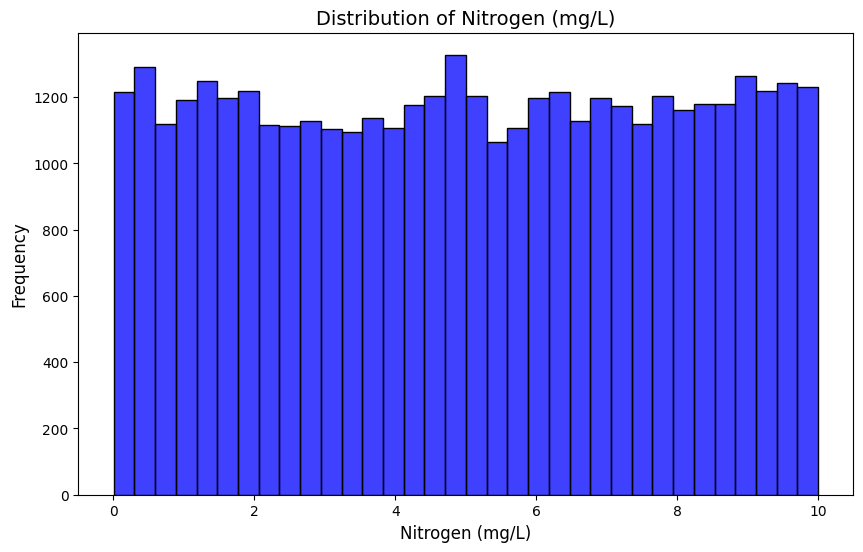

In [31]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['nitrogen_(mg/L)'], kde=False, color='blue', edgecolor='black')
ax
# Adding title and labels
plt.title('Distribution of Nitrogen (mg/L)', fontsize=14)
plt.xlabel('Nitrogen (mg/L)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()
# the distribution is almost even, maxing out at 5mg/L
# the distribution is wierd as it contradicts the state of the sewage system graph above
# the histogram should be skewed to the left...

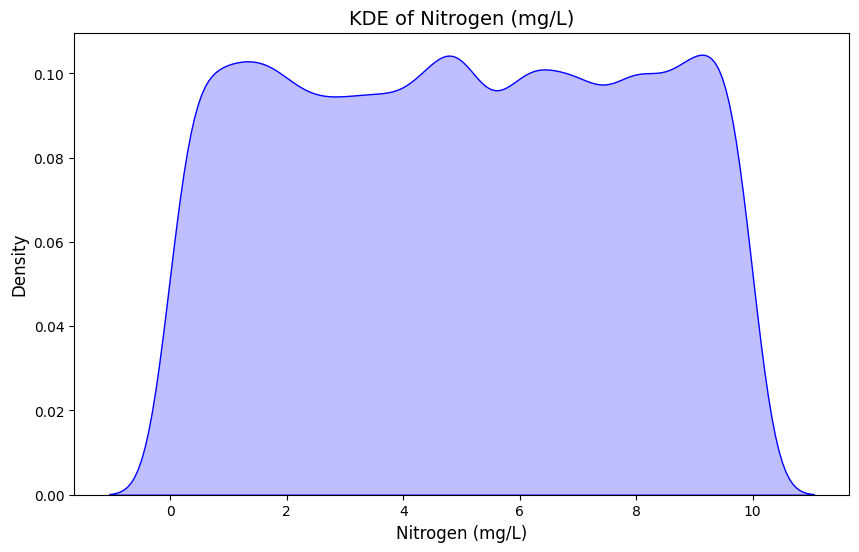

In [32]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['nitrogen_(mg/L)'], fill=True, color='blue', shade=True)

# Adding title and labels
plt.title('KDE of Nitrogen (mg/L)', fontsize=14)
plt.xlabel('Nitrogen (mg/L)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.show()
# the distribution is almost even, maxing out at 5mg/L
# the distribution is wierd as it contradicts the state of the sewage system graph above
# the graph should be skewed to the left...

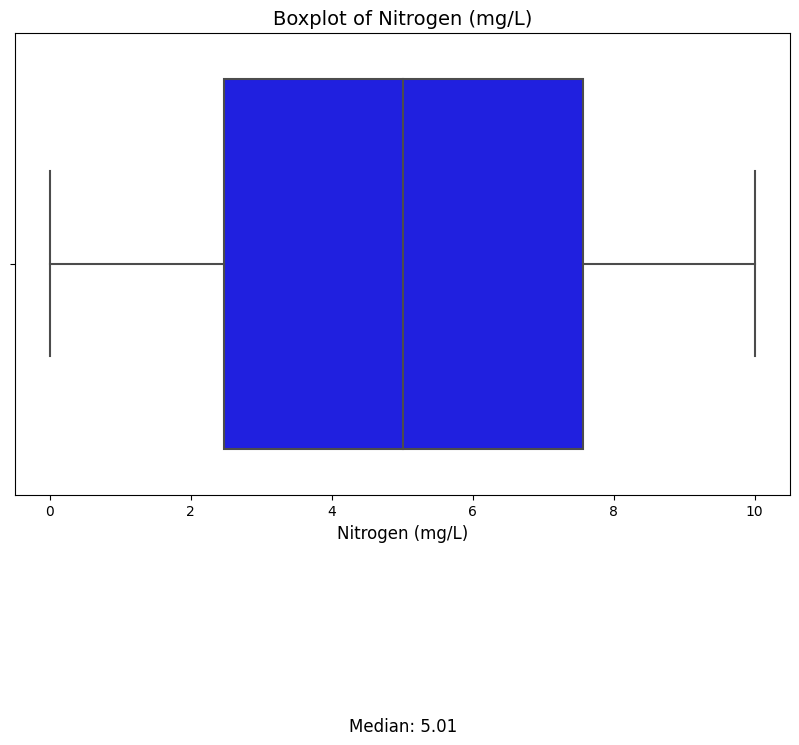

In [33]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=df['nitrogen_(mg/L)'], color='blue')
# Add the median value as a label
median_value = df['nitrogen_(mg/L)'].median()
ax.text(median_value, 1.02, f'Median: {median_value:.2f}', color='black', ha='center', va='bottom', fontsize=12)
# Adding title and labels
plt.title('Boxplot of Nitrogen (mg/L)', fontsize=14)
plt.xlabel('Nitrogen (mg/L)', fontsize=12)

# Show the plot
plt.show()
# most of the points are between (2.5 and 7.5) mg/L
# the outhliers should be removed if ML to be performed

#### 5.1.7. plot the distribution of phosphorus_(mg/L)

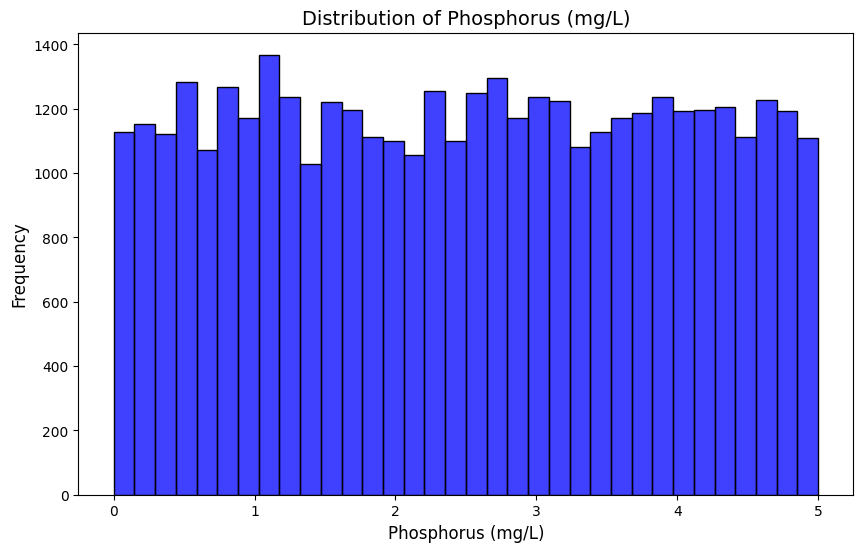

In [34]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['phosphorus_(mg/L)'], kde=False, color='blue', edgecolor='black')
ax
# Adding title and labels
plt.title('Distribution of Phosphorus (mg/L)', fontsize=14)
plt.xlabel('Phosphorus (mg/L)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()
# the distribution is almost even, maxing out 1mg/L
# the distribution is wierd as it contradicts the state of the sewage system plot
# the histogram should be skewed to the left...

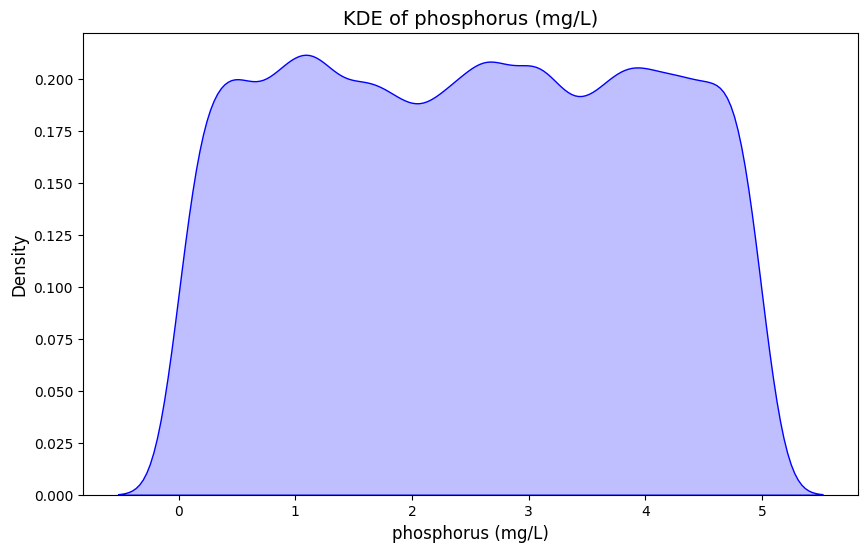

In [35]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['phosphorus_(mg/L)'], fill=True, color='blue', shade=True)

# Adding title and labels
plt.title('KDE of phosphorus (mg/L)', fontsize=14)
plt.xlabel('phosphorus (mg/L)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.show()
# the distribution is almost even, maxing out 1mg/L
# the distribution is wierd as it contradicts the state of the sewage system plot
# the histogram should be skewed to the left...

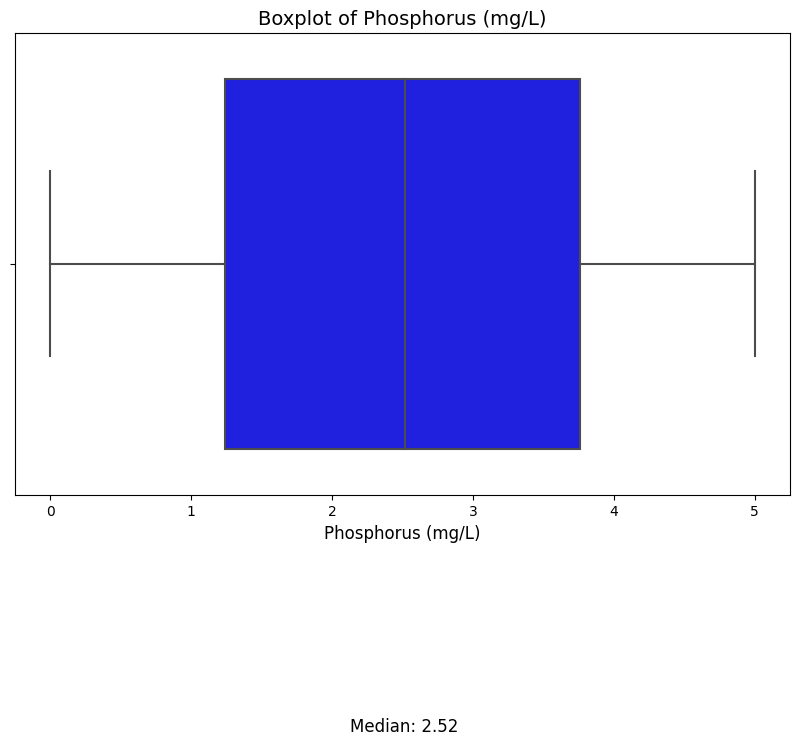

In [36]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=df['phosphorus_(mg/L)'], color='blue')
# Add the median value as a label
median_value = df['phosphorus_(mg/L)'].median()
ax.text(median_value, 1.02, f'Median: {median_value:.2f}', color='black', ha='center', va='bottom', fontsize=12)
# Adding title and labels
plt.title('Boxplot of Phosphorus (mg/L)', fontsize=14)
plt.xlabel('Phosphorus (mg/L)', fontsize=12)

# Show the plot
plt.show()
# most of the points are between (1.2 and 3.8) mg/L
# the outhliers should be removed if ML to be performed

## 5.2. Bivariate Analysis

### 5.2.1. Relationship between nitrogen_(mg/L) and state_of_sewage_system.

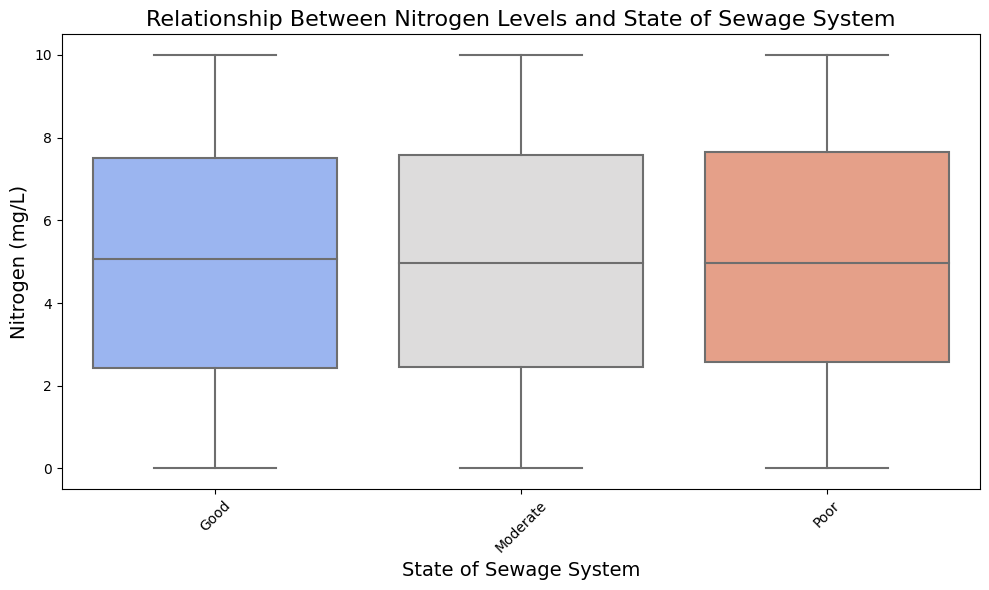

In [37]:
# Box plot to show the distribution
plt.figure(figsize=(10, 6))

# Boxplot to show the distribution
sns.boxplot(data=df, x='state_of_sewage_system', y='nitrogen_(mg/L)', palette='coolwarm')

plt.title('Relationship Between Nitrogen Levels and State of Sewage System', fontsize=16)
plt.xlabel('State of Sewage System', fontsize=14)
plt.ylabel('Nitrogen (mg/L)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# the box plots for the sewage system states is almost the same
# this means that the nitrogen level has no effect on the state of sewage system which should be wrong.

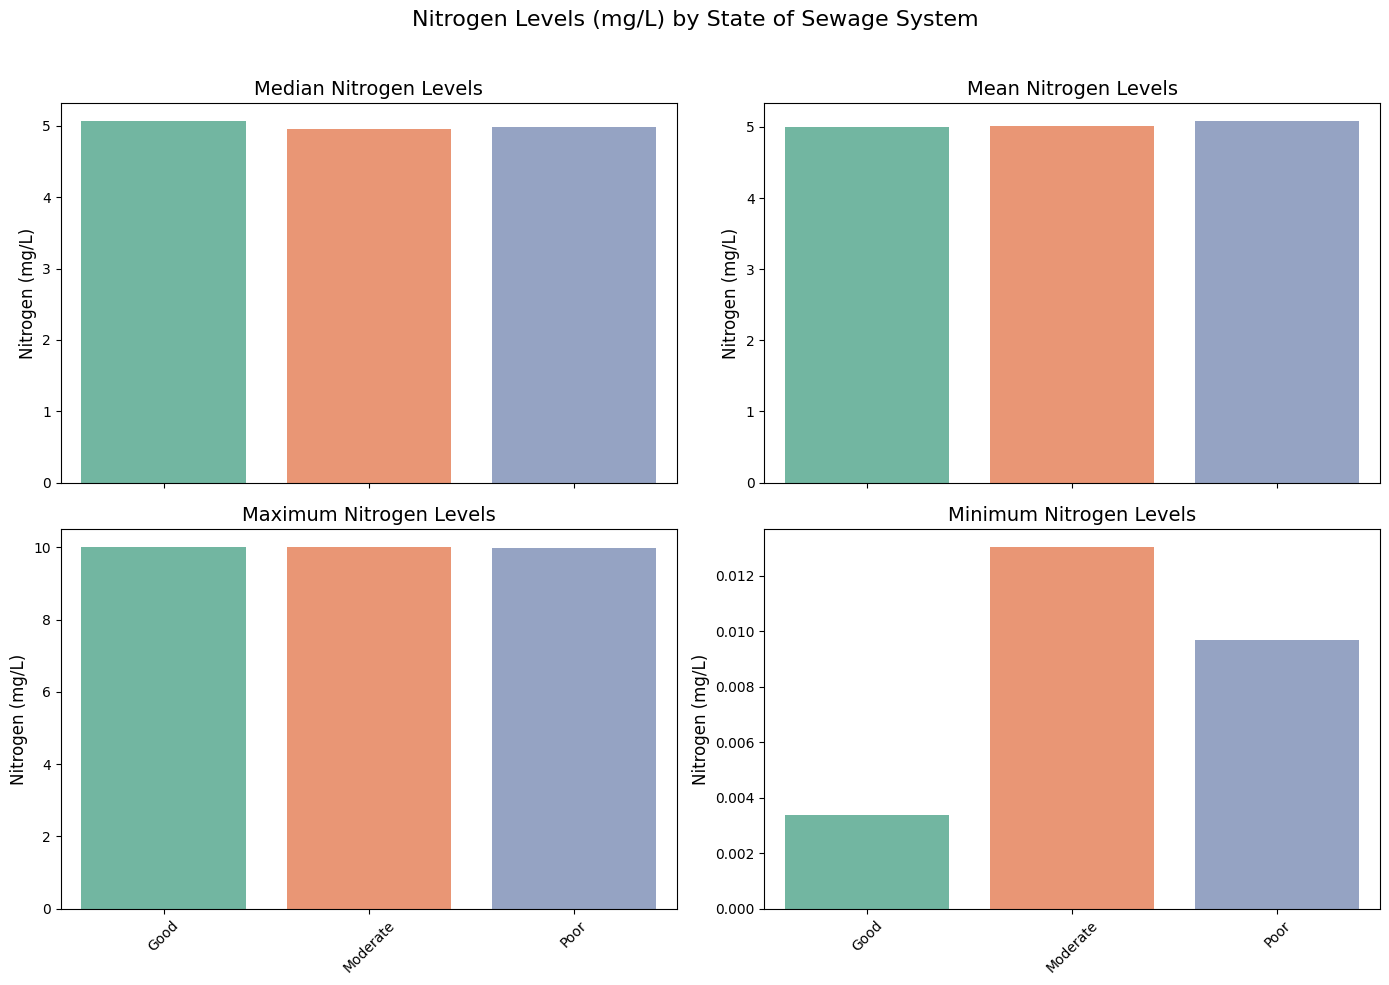

In [38]:
# Calculate statistics
stats = df.groupby('state_of_sewage_system')['nitrogen_(mg/L)'].agg(['median', 'mean', 'max', 'min']).reset_index()

# Set up the subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
metrics = ['median', 'mean', 'max', 'min']
titles = ['Median Nitrogen Levels', 'Mean Nitrogen Levels', 
          'Maximum Nitrogen Levels', 'Minimum Nitrogen Levels']

for ax, metric, title in zip(axes.flatten(), metrics, titles):
    sns.barplot(data=stats, x='state_of_sewage_system', y=metric, ax=ax, palette='Set2')
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('')  # Remove individual x-axis labels
    ax.set_ylabel('Nitrogen (mg/L)', fontsize=12)
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
fig.suptitle('Nitrogen Levels (mg/L) by State of Sewage System', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
# from the below graphs, there is no relationship between the state of the sewage system and the nitrogen concentration.
# this should be investigated as it is not logical according to the dataset

This will be investigated closely in the multivariate analysis section to spot wrong enteries

#### 5.2.2. Relationship between phosphorus_(mg/L) and state_of_sewage_system.

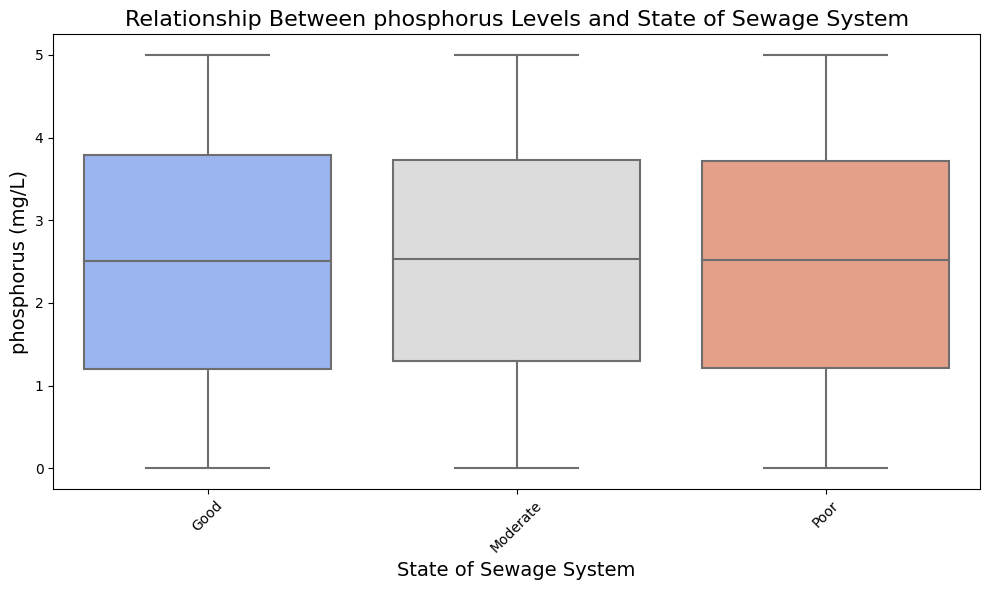

In [39]:
# Box plot to show the distribution
plt.figure(figsize=(10, 6))

# Boxplot to show the distribution
sns.boxplot(data=df, x='state_of_sewage_system', y='phosphorus_(mg/L)', palette='coolwarm')

plt.title('Relationship Between phosphorus Levels and State of Sewage System', fontsize=16)
plt.xlabel('State of Sewage System', fontsize=14)
plt.ylabel('phosphorus (mg/L)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# the box plots for the sewage system states is almost the same
# this means that the phosphorus level has no effect on the state of sewage system which should be wrong.

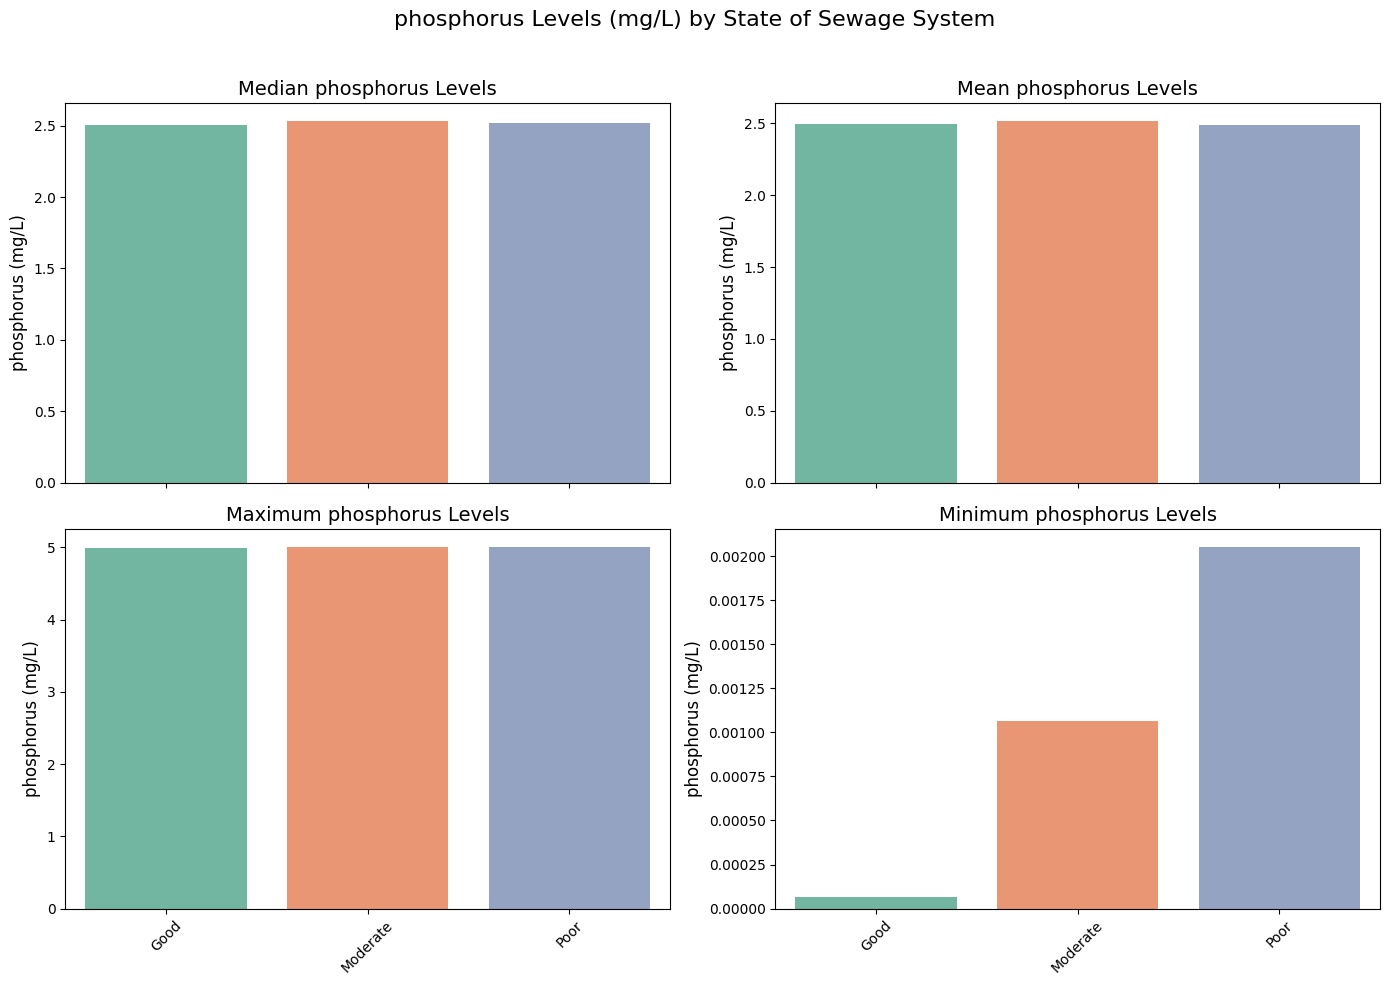

In [40]:
# Calculate statistics
stats = df.groupby('state_of_sewage_system')['phosphorus_(mg/L)'].agg(['median', 'mean', 'max', 'min']).reset_index()

# Set up the subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
metrics = ['median', 'mean', 'max', 'min']
titles = ['Median phosphorus Levels', 'Mean phosphorus Levels', 
          'Maximum phosphorus Levels', 'Minimum phosphorus Levels']

for ax, metric, title in zip(axes.flatten(), metrics, titles):
    sns.barplot(data=stats, x='state_of_sewage_system', y=metric, ax=ax, palette='Set2')
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('')  # Remove individual x-axis labels
    ax.set_ylabel('phosphorus (mg/L)', fontsize=12)
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
fig.suptitle('phosphorus Levels (mg/L) by State of Sewage System', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
# from the below graphs, there is no relationship between the state of the sewage system and the phosphorus concentration.
# this should be investigated as it is not logical according to the dataset

This will be investigated closely in the multivariate analysis section to spot wrong enteries

### 5.2.3. Relationship between nitrogen_(mg/L) and phosphorus_(mg/L)

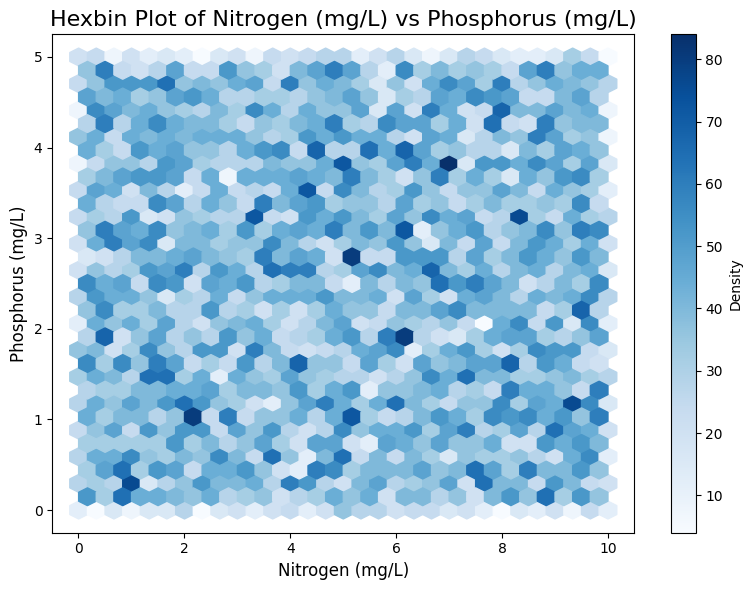

In [41]:
plt.figure(figsize=(8, 6))
plt.hexbin(df['nitrogen_(mg/L)'], df['phosphorus_(mg/L)'], gridsize=30, cmap='Blues')
plt.colorbar(label='Density')

# Titles and labels
plt.title('Hexbin Plot of Nitrogen (mg/L) vs Phosphorus (mg/L)', fontsize=16)
plt.xlabel('Nitrogen (mg/L)', fontsize=12)
plt.ylabel('Phosphorus (mg/L)', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

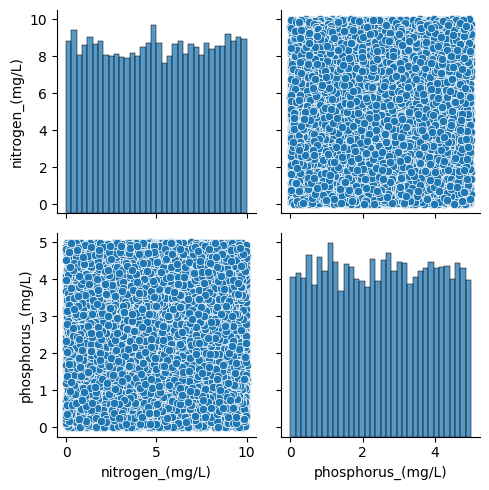

In [42]:
# Pair plot: Relationship between nitrogen_(mg/L) and phosphorus_(mg/L)
sns.pairplot(df[['nitrogen_(mg/L)', 'phosphorus_(mg/L)']])

# Show plot
plt.tight_layout()
plt.show()

## 5.3. Multivariate Analysis

### 5.3.1. Correlation between nitrogen_(mg/L) and phosphorus_(mg/L)

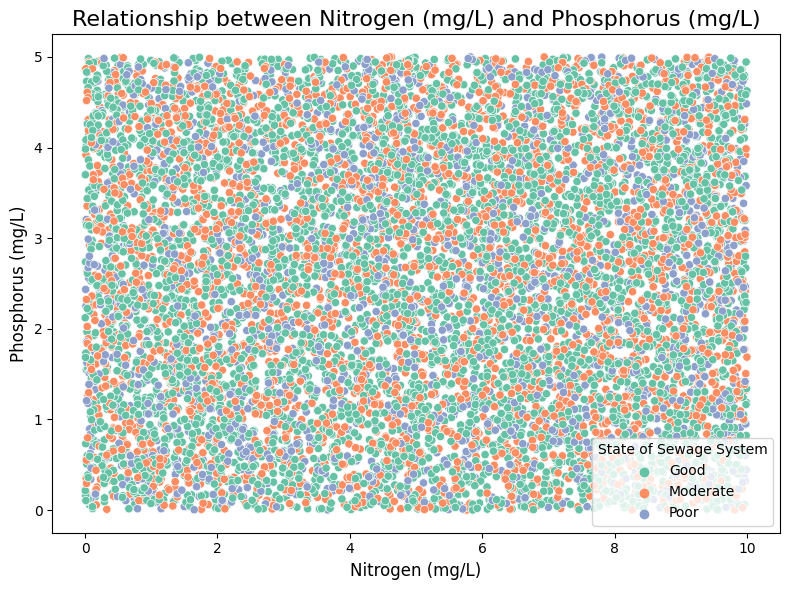

Pearson Correlation between Nitrogen and Phosphorus: -0.00


In [43]:
# Scatter plot: Relationship between nitrogen_(mg/L) and phosphorus_(mg/L)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='nitrogen_(mg/L)', y='phosphorus_(mg/L)', hue='state_of_sewage_system', palette='Set2')

# Titles and labels
plt.title('Relationship between Nitrogen (mg/L) and Phosphorus (mg/L)', fontsize=16)
plt.xlabel('Nitrogen (mg/L)', fontsize=12)
plt.ylabel('Phosphorus (mg/L)', fontsize=12)
plt.legend(title='State of Sewage System')

# Show plot
plt.tight_layout()
plt.show()

# Calculate and print Pearson correlation
correlation = df[['nitrogen_(mg/L)', 'phosphorus_(mg/L)']].corr().iloc[0, 1]
print(f'Pearson Correlation between Nitrogen and Phosphorus: {correlation:.2f}')
# there is no correlation between both variables

### 5.2.2. nitrogen_(mg/L) Distribution by date and state of sewage system

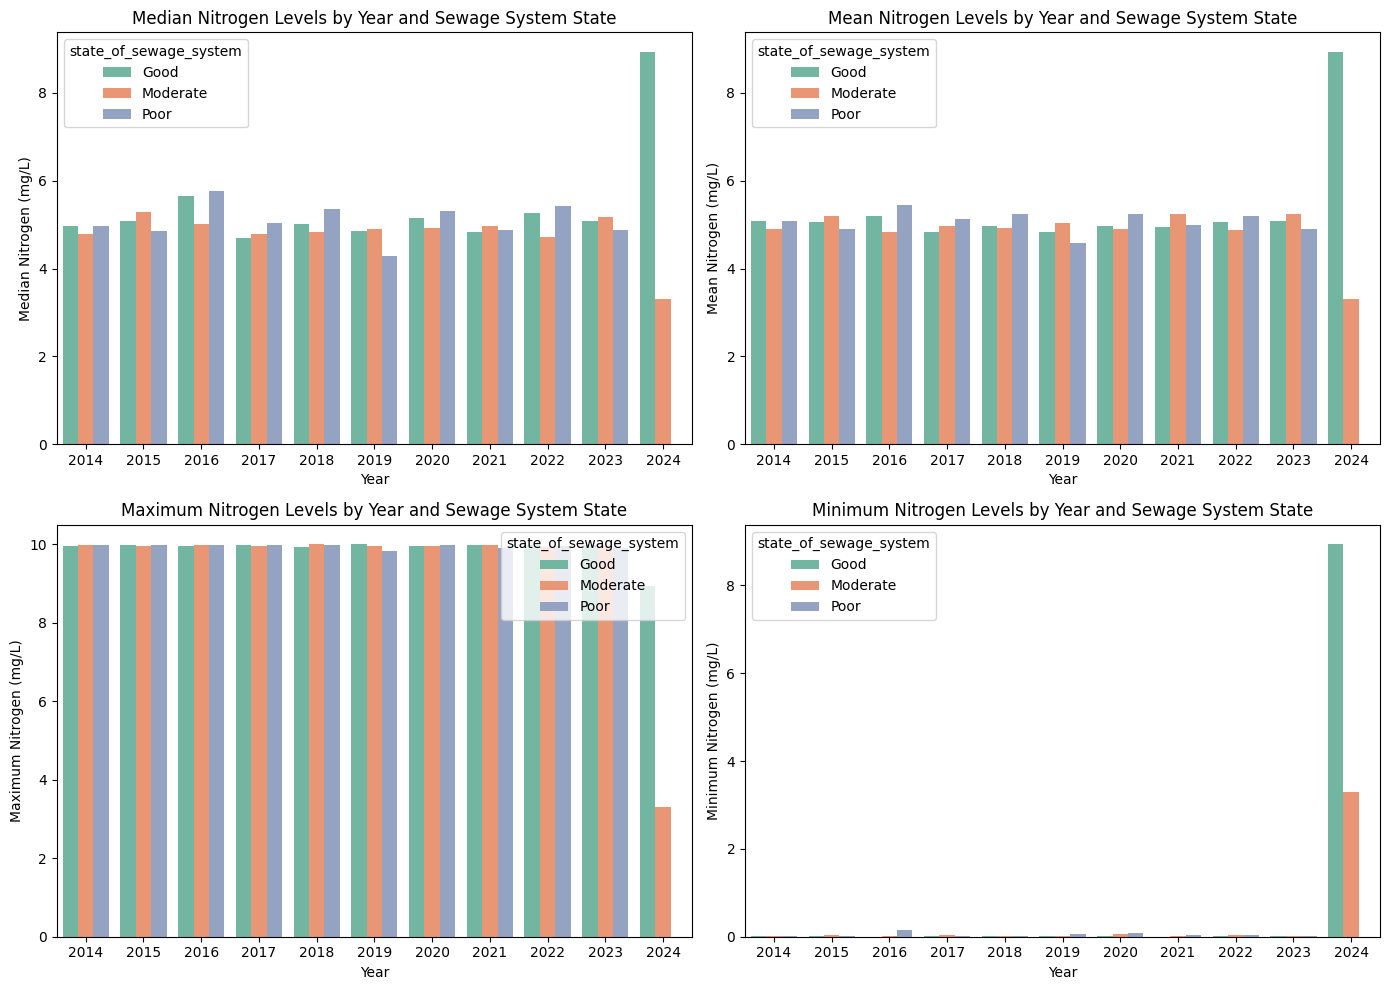

In [44]:
# Group by 'state_of_sewage_system' and 'year', then calculate the desired statistics
grouped = df.groupby(['state_of_sewage_system', 'sampling_year'])['nitrogen_(mg/L)'].agg(['median', 'mean', 'max', 'min']).reset_index()

# Create a 2x2 grid for the subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot the median nitrogen levels
sns.barplot(data=grouped, x='sampling_year', y='median', hue='state_of_sewage_system', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Median Nitrogen Levels by Year and Sewage System State')
axes[0, 0].set_ylabel('Median Nitrogen (mg/L)')
axes[0, 0].set_xlabel('Year')

# Plot the mean nitrogen levels
sns.barplot(data=grouped, x='sampling_year', y='mean', hue='state_of_sewage_system', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Mean Nitrogen Levels by Year and Sewage System State')
axes[0, 1].set_ylabel('Mean Nitrogen (mg/L)')
axes[0, 1].set_xlabel('Year')

# Plot the max nitrogen levels
sns.barplot(data=grouped, x='sampling_year', y='max', hue='state_of_sewage_system', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Maximum Nitrogen Levels by Year and Sewage System State')
axes[1, 0].set_ylabel('Maximum Nitrogen (mg/L)')
axes[1, 0].set_xlabel('Year')

# Plot the min nitrogen levels
sns.barplot(data=grouped, x='sampling_year', y='min', hue='state_of_sewage_system', ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Minimum Nitrogen Levels by Year and Sewage System State')
axes[1, 1].set_ylabel('Minimum Nitrogen (mg/L)')
axes[1, 1].set_xlabel('Year')

# Add data labels on top of each bar
#for ax in axes.flat:
#    for p in ax.patches:
#        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [45]:
df_2014_2023 = df[df['sampling_year'] != 2024].copy()
df_2014_2023['sampling_year'].value_counts()

sampling_year
2023    4132
2017    4072
2022    4064
2016    4060
2018    4040
2020    4024
2021    4008
2019    3920
2014    3912
2015    3840
Name: count, dtype: int64

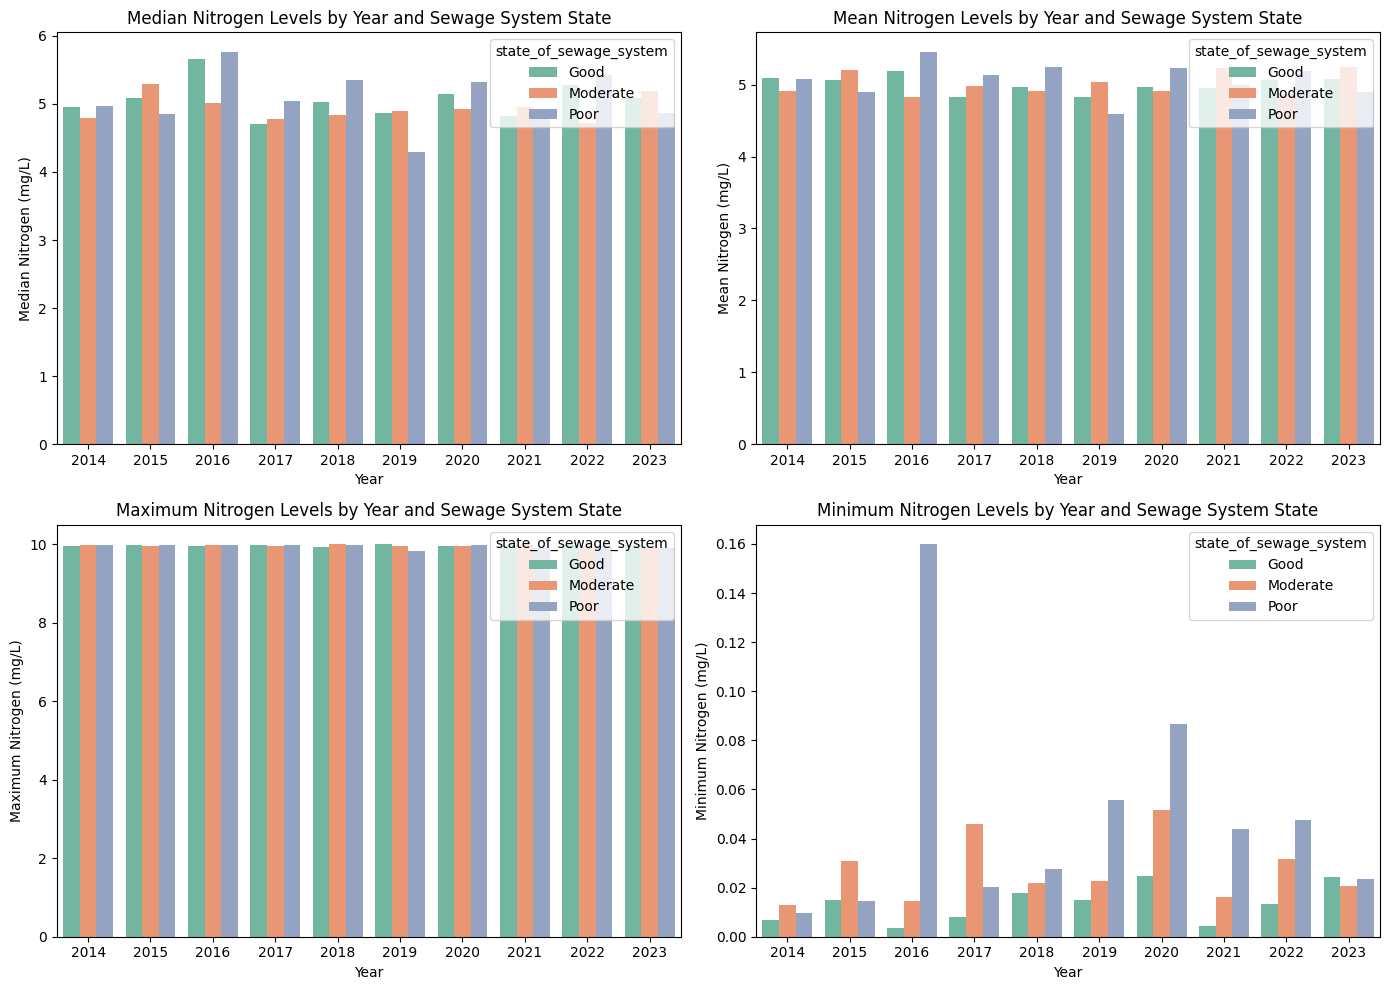

In [46]:
# Group by 'state_of_sewage_system' and 'year', then calculate the desired statistics
grouped = df_2014_2023.groupby(['state_of_sewage_system', 'sampling_year'])['nitrogen_(mg/L)'].agg(['median', 'mean', 'max', 'min']).reset_index()

# Create a 2x2 grid for the subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot the median nitrogen levels
sns.barplot(data=grouped, x='sampling_year', y='median', hue='state_of_sewage_system', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Median Nitrogen Levels by Year and Sewage System State')
axes[0, 0].set_ylabel('Median Nitrogen (mg/L)')
axes[0, 0].set_xlabel('Year')

# Plot the mean nitrogen levels
sns.barplot(data=grouped, x='sampling_year', y='mean', hue='state_of_sewage_system', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Mean Nitrogen Levels by Year and Sewage System State')
axes[0, 1].set_ylabel('Mean Nitrogen (mg/L)')
axes[0, 1].set_xlabel('Year')

# Plot the max nitrogen levels
sns.barplot(data=grouped, x='sampling_year', y='max', hue='state_of_sewage_system', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Maximum Nitrogen Levels by Year and Sewage System State')
axes[1, 0].set_ylabel('Maximum Nitrogen (mg/L)')
axes[1, 0].set_xlabel('Year')

# Plot the min nitrogen levels
sns.barplot(data=grouped, x='sampling_year', y='min', hue='state_of_sewage_system', ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Minimum Nitrogen Levels by Year and Sewage System State')
axes[1, 1].set_ylabel('Minimum Nitrogen (mg/L)')
axes[1, 1].set_xlabel('Year')

# Add data labels on top of each bar
#for ax in axes.flat:
#    for p in ax.patches:
#        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
# the median concentration is almost the same between the sewage system states
# the mean concentration is almost the same between the sewage system states
# the maximum concentration is almost the same between the sewage system states
# the minimum concentration can sometimes be higher in moderate sewage systems than poor sewage systems, it also spiked up in 2016

### 5.2.3. phosphorus_(mg/L) Distribution by date and state of sewage system

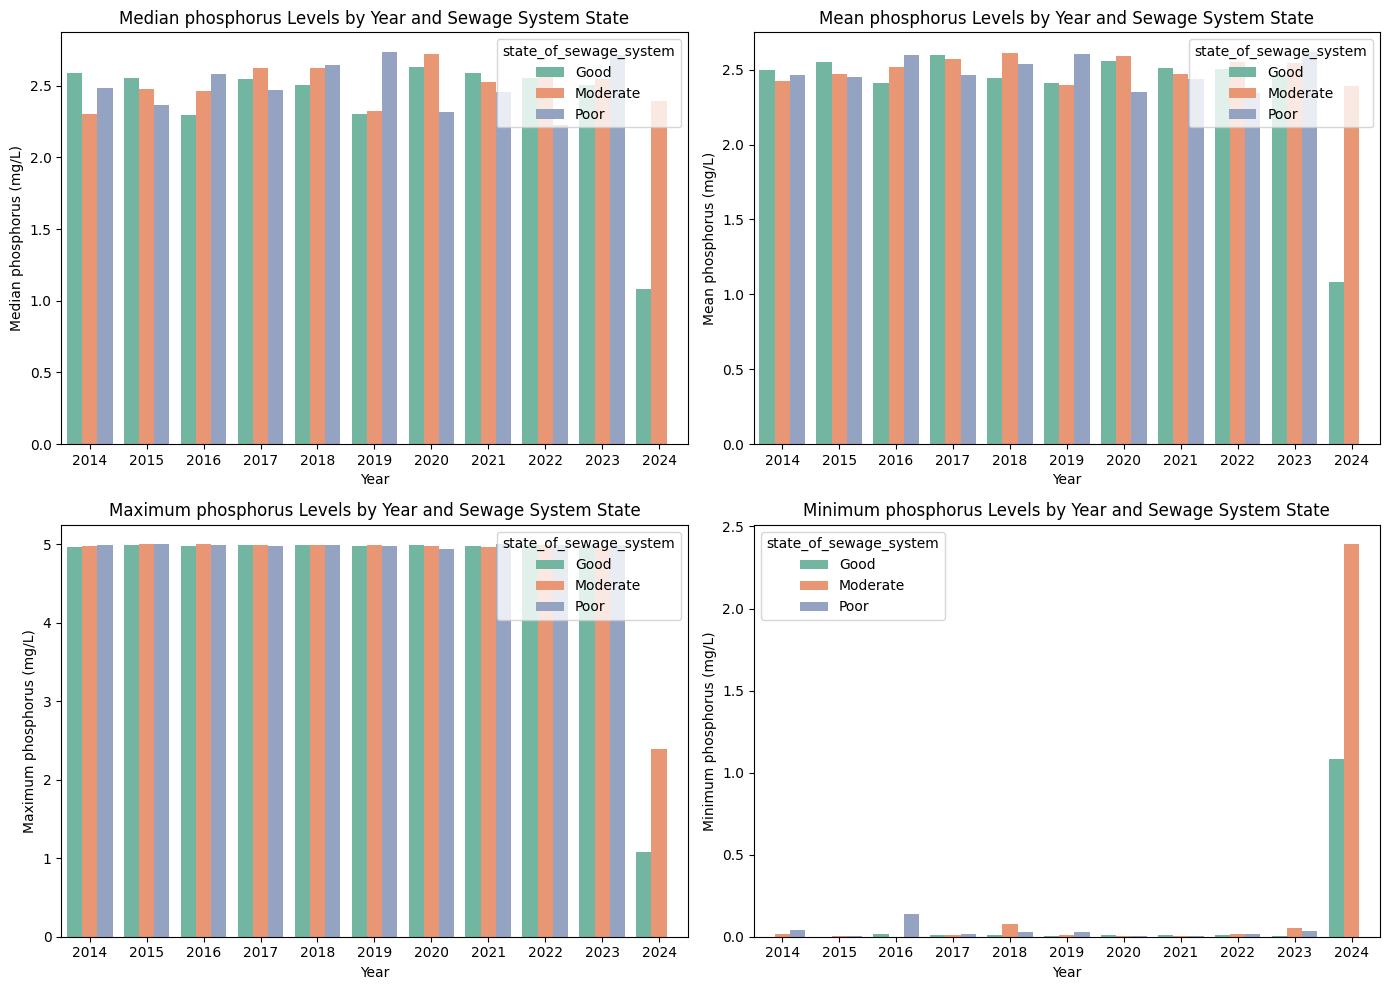

In [47]:
# Group by 'state_of_sewage_system' and 'year', then calculate the desired statistics
grouped = df.groupby(['state_of_sewage_system', 'sampling_year'])['phosphorus_(mg/L)'].agg(['median', 'mean', 'max', 'min']).reset_index()

# Create a 2x2 grid for the subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot the median nitrogen levels
sns.barplot(data=grouped, x='sampling_year', y='median', hue='state_of_sewage_system', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Median phosphorus Levels by Year and Sewage System State')
axes[0, 0].set_ylabel('Median phosphorus (mg/L)')
axes[0, 0].set_xlabel('Year')

# Plot the mean nitrogen levels
sns.barplot(data=grouped, x='sampling_year', y='mean', hue='state_of_sewage_system', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Mean phosphorus Levels by Year and Sewage System State')
axes[0, 1].set_ylabel('Mean phosphorus (mg/L)')
axes[0, 1].set_xlabel('Year')

# Plot the max nitrogen levels
sns.barplot(data=grouped, x='sampling_year', y='max', hue='state_of_sewage_system', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Maximum phosphorus Levels by Year and Sewage System State')
axes[1, 0].set_ylabel('Maximum phosphorus (mg/L)')
axes[1, 0].set_xlabel('Year')

# Plot the min nitrogen levels
sns.barplot(data=grouped, x='sampling_year', y='min', hue='state_of_sewage_system', ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Minimum phosphorus Levels by Year and Sewage System State')
axes[1, 1].set_ylabel('Minimum phosphorus (mg/L)')
axes[1, 1].set_xlabel('Year')

# Add data labels on top of each bar
#for ax in axes.flat:
#    for p in ax.patches:
#        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

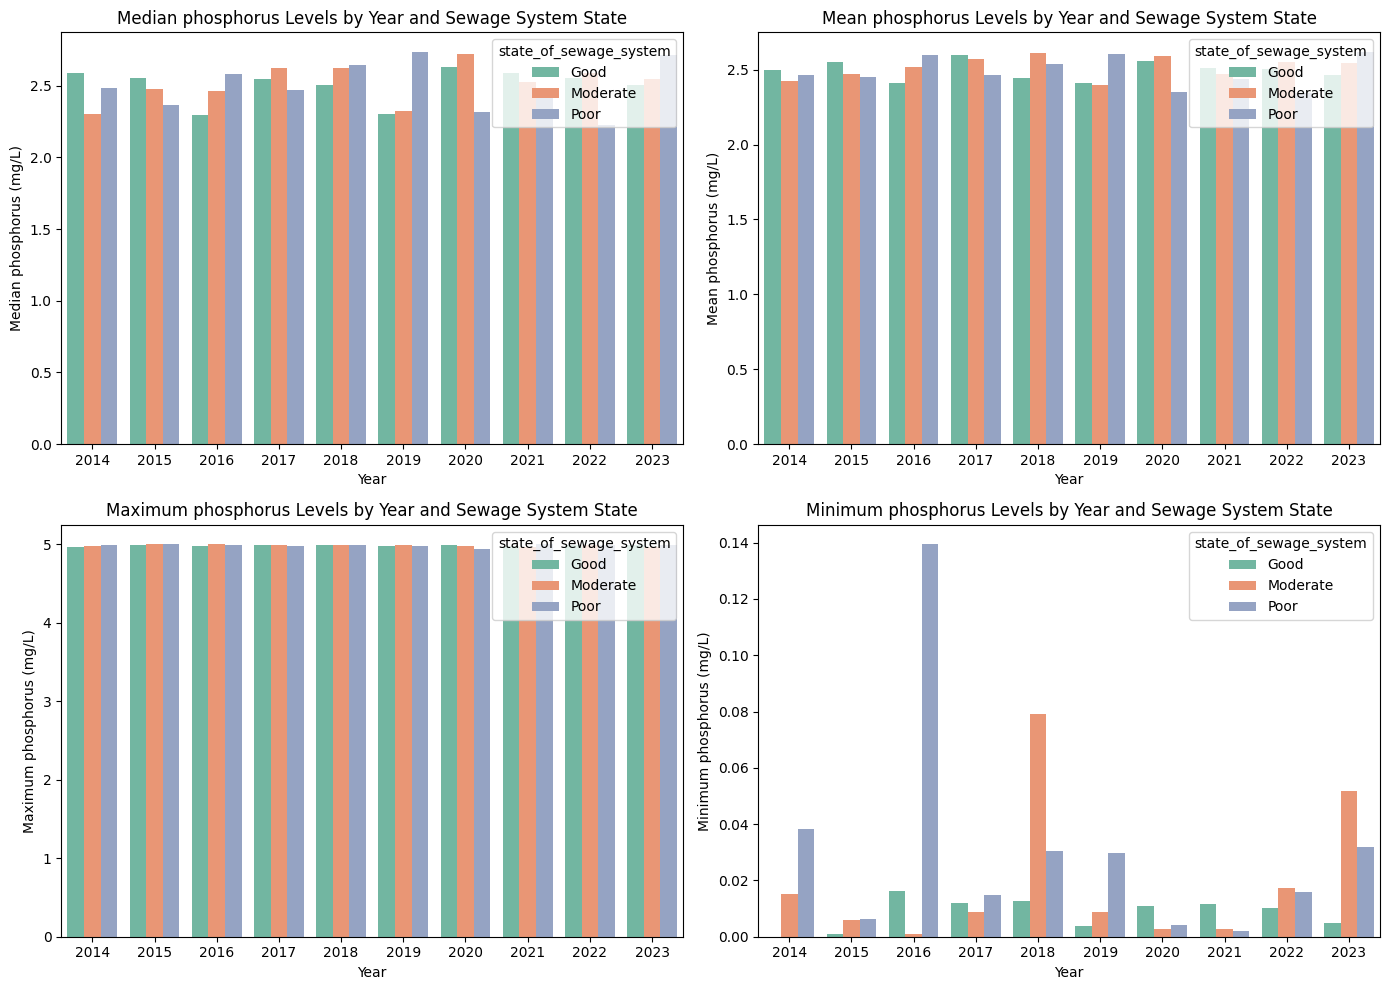

In [48]:
# Code after removing year 2024
# Group by 'state_of_sewage_system' and 'year', then calculate the desired statistics
grouped = df_2014_2023.groupby(['state_of_sewage_system', 'sampling_year'])['phosphorus_(mg/L)'].agg(['median', 'mean', 'max', 'min']).reset_index()

# Create a 2x2 grid for the subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot the median nitrogen levels
sns.barplot(data=grouped, x='sampling_year', y='median', hue='state_of_sewage_system', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Median phosphorus Levels by Year and Sewage System State')
axes[0, 0].set_ylabel('Median phosphorus (mg/L)')
axes[0, 0].set_xlabel('Year')

# Plot the mean nitrogen levels
sns.barplot(data=grouped, x='sampling_year', y='mean', hue='state_of_sewage_system', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Mean phosphorus Levels by Year and Sewage System State')
axes[0, 1].set_ylabel('Mean phosphorus (mg/L)')
axes[0, 1].set_xlabel('Year')

# Plot the max nitrogen levels
sns.barplot(data=grouped, x='sampling_year', y='max', hue='state_of_sewage_system', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Maximum phosphorus Levels by Year and Sewage System State')
axes[1, 0].set_ylabel('Maximum phosphorus (mg/L)')
axes[1, 0].set_xlabel('Year')

# Plot the min nitrogen levels
sns.barplot(data=grouped, x='sampling_year', y='min', hue='state_of_sewage_system', ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Minimum phosphorus Levels by Year and Sewage System State')
axes[1, 1].set_ylabel('Minimum phosphorus (mg/L)')
axes[1, 1].set_xlabel('Year')

# Add data labels on top of each bar
#for ax in axes.flat:
#    for p in ax.patches:
#        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# the median concentration is almost the same between the sewage system states
# the mean concentration is almost the same between the sewage system states
# the maximum concentration is almost the same between the sewage system states
# the minimum concentration can sometimes be higher in moderate sewage systems than poor sewage systems, it also spiked up in 2016

#### 5.3.4. state_of_sewage_system Distribution by year, quarter, month and day.

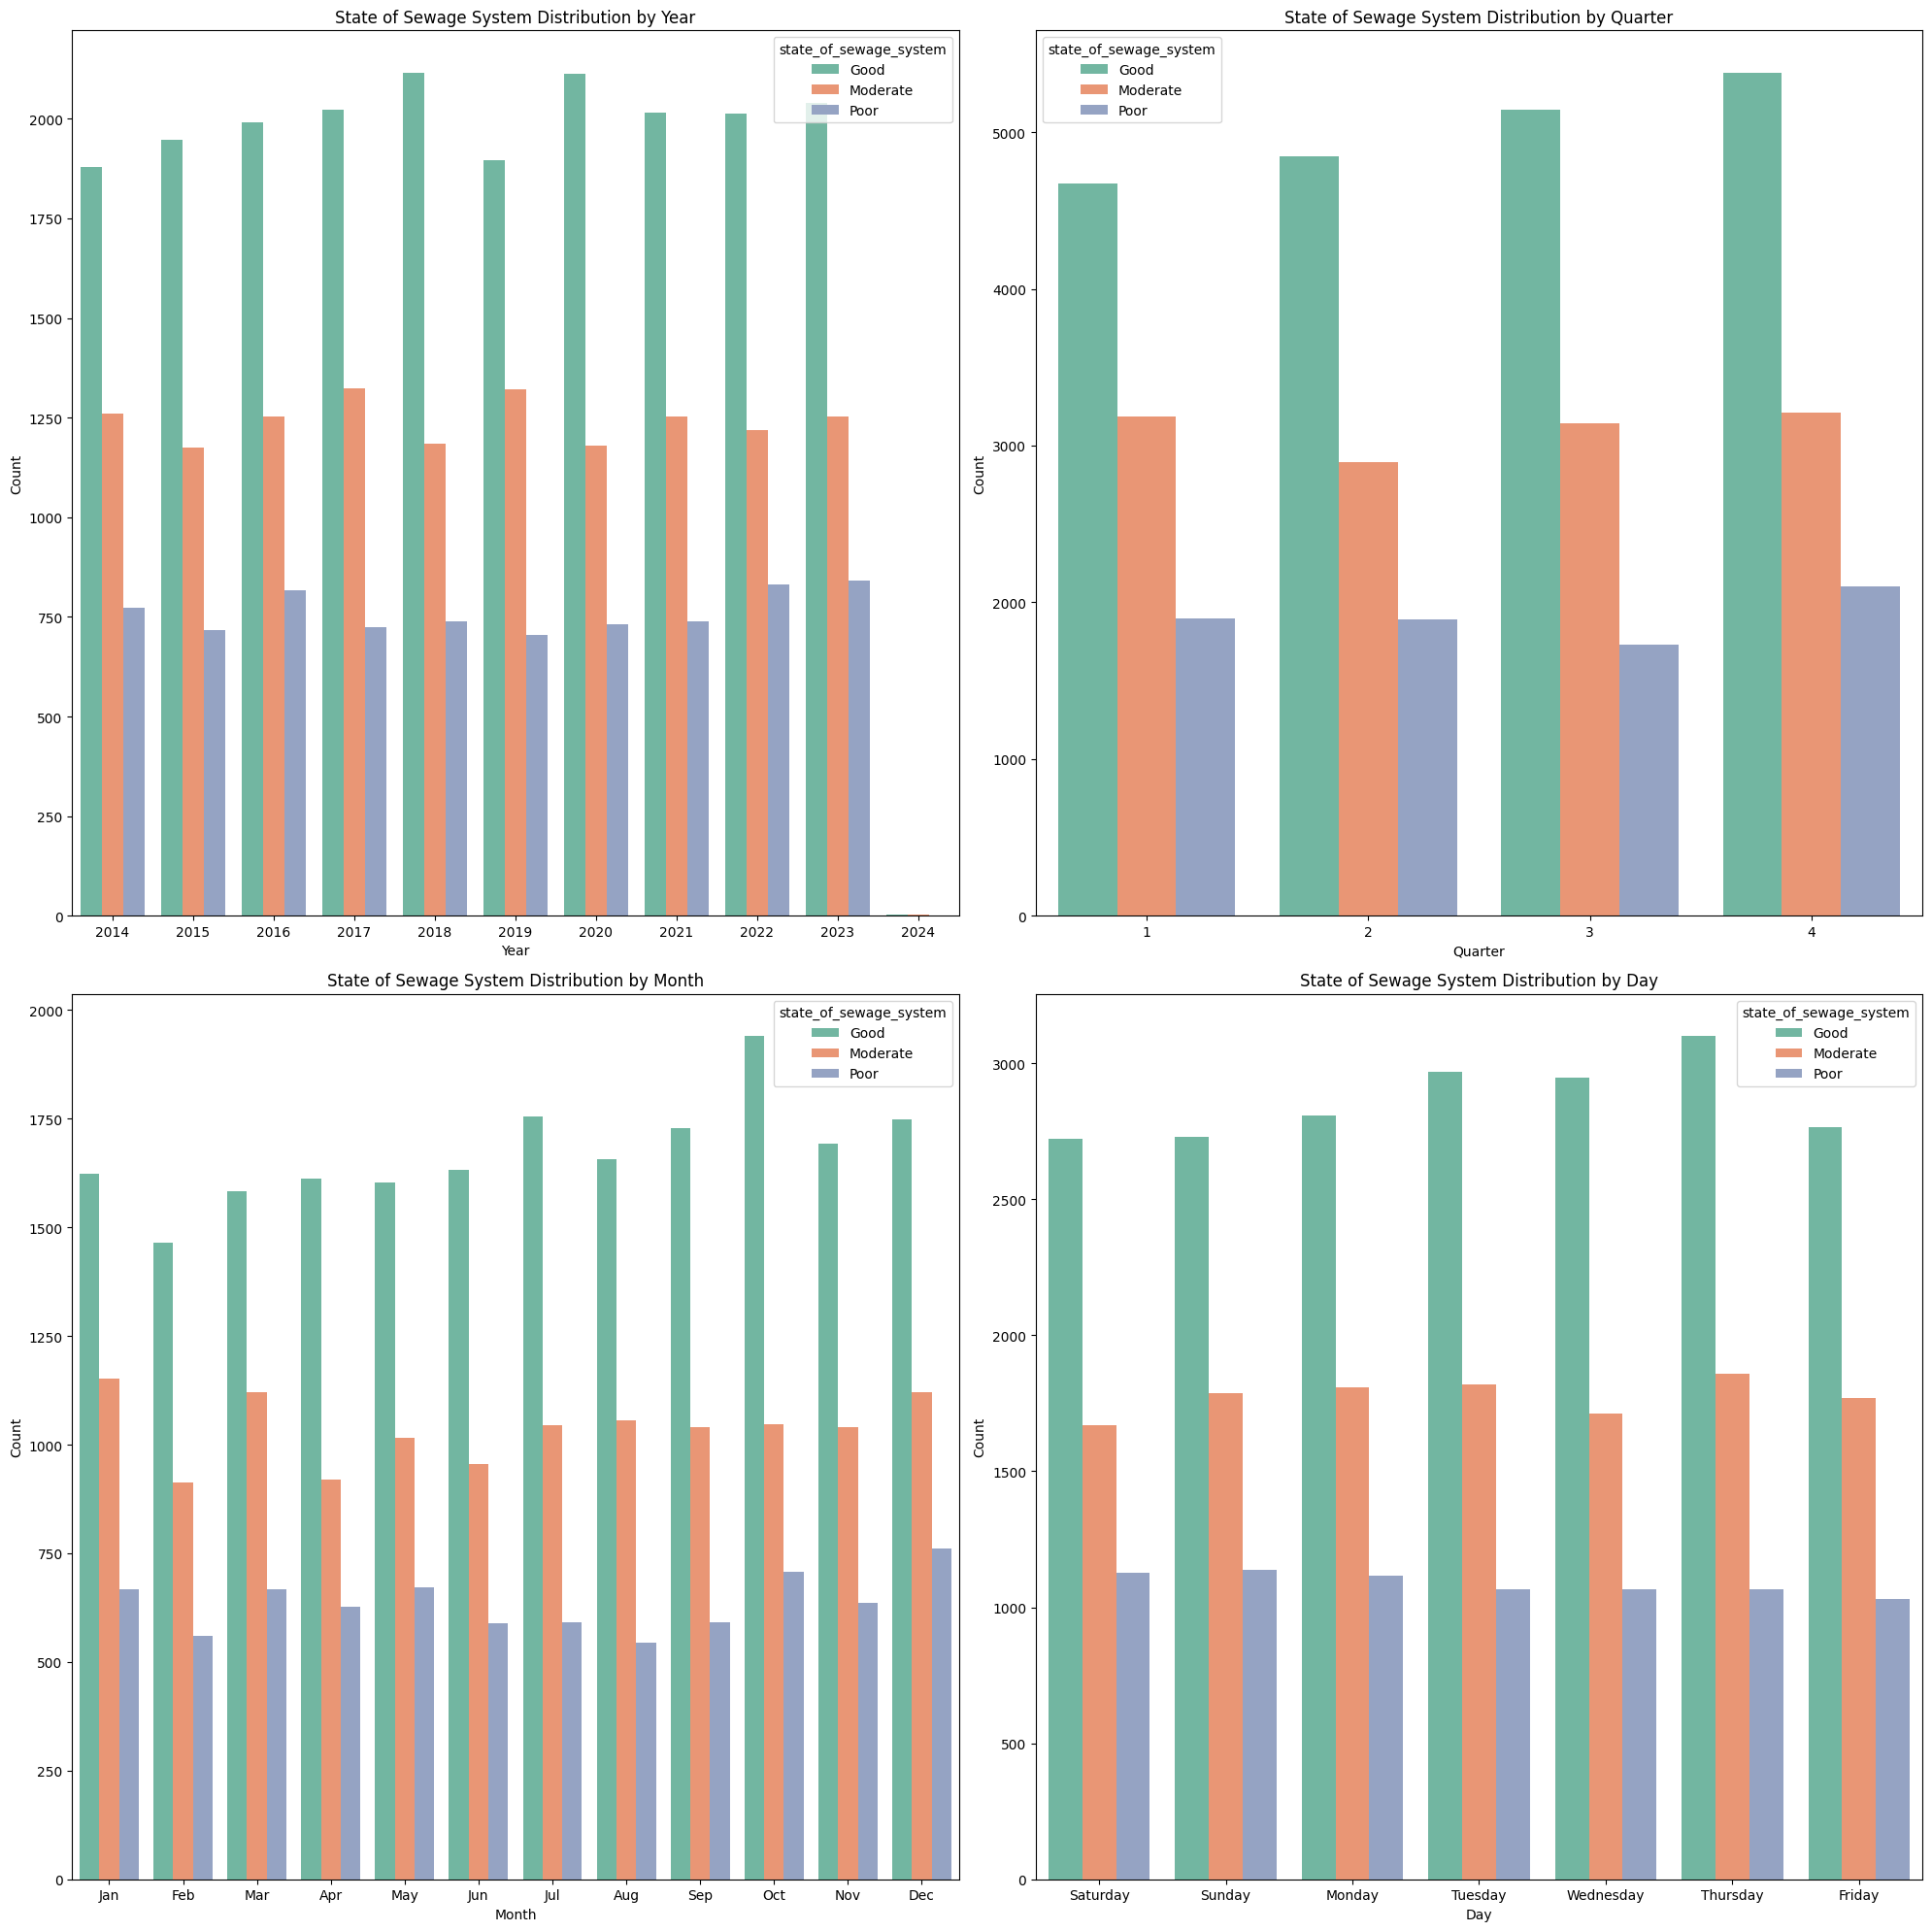

In [49]:
# Set up the 2x2 grid for the subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Yearly Distribution
sns.countplot(data=df, x='sampling_year', hue='state_of_sewage_system', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('State of Sewage System Distribution by Year')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Count')

# Quarterly Distribution
sns.countplot(data=df, x='sampling_quarter', hue='state_of_sewage_system', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('State of Sewage System Distribution by Quarter')
axes[0, 1].set_xlabel('Quarter')
axes[0, 1].set_ylabel('Count')

# Monthly Distribution
sns.countplot(data=df, x='sampling_month', hue='state_of_sewage_system', ax=axes[1, 0], palette='Set2', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1, 0].set_title('State of Sewage System Distribution by Month')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Count')

# Daily Distribution
sns.countplot(data=df, x='sampling_day', hue='state_of_sewage_system', ax=axes[1, 1], palette='Set2', order=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
axes[1, 1].set_title('State of Sewage System Distribution by Day')
axes[1, 1].set_xlabel('Day')
axes[1, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
# Move legend outside the plot (outside the right side)
plt.show()
# the state of sewage system is almost the same in every year, but there was an increase in 2023 over 2022
# the last quarter in the years shows the highest poor sewage system states
# October has highest sewage system state, but december has the poorest
# The sewage system state is best at thursdays, but poorest on Sundays

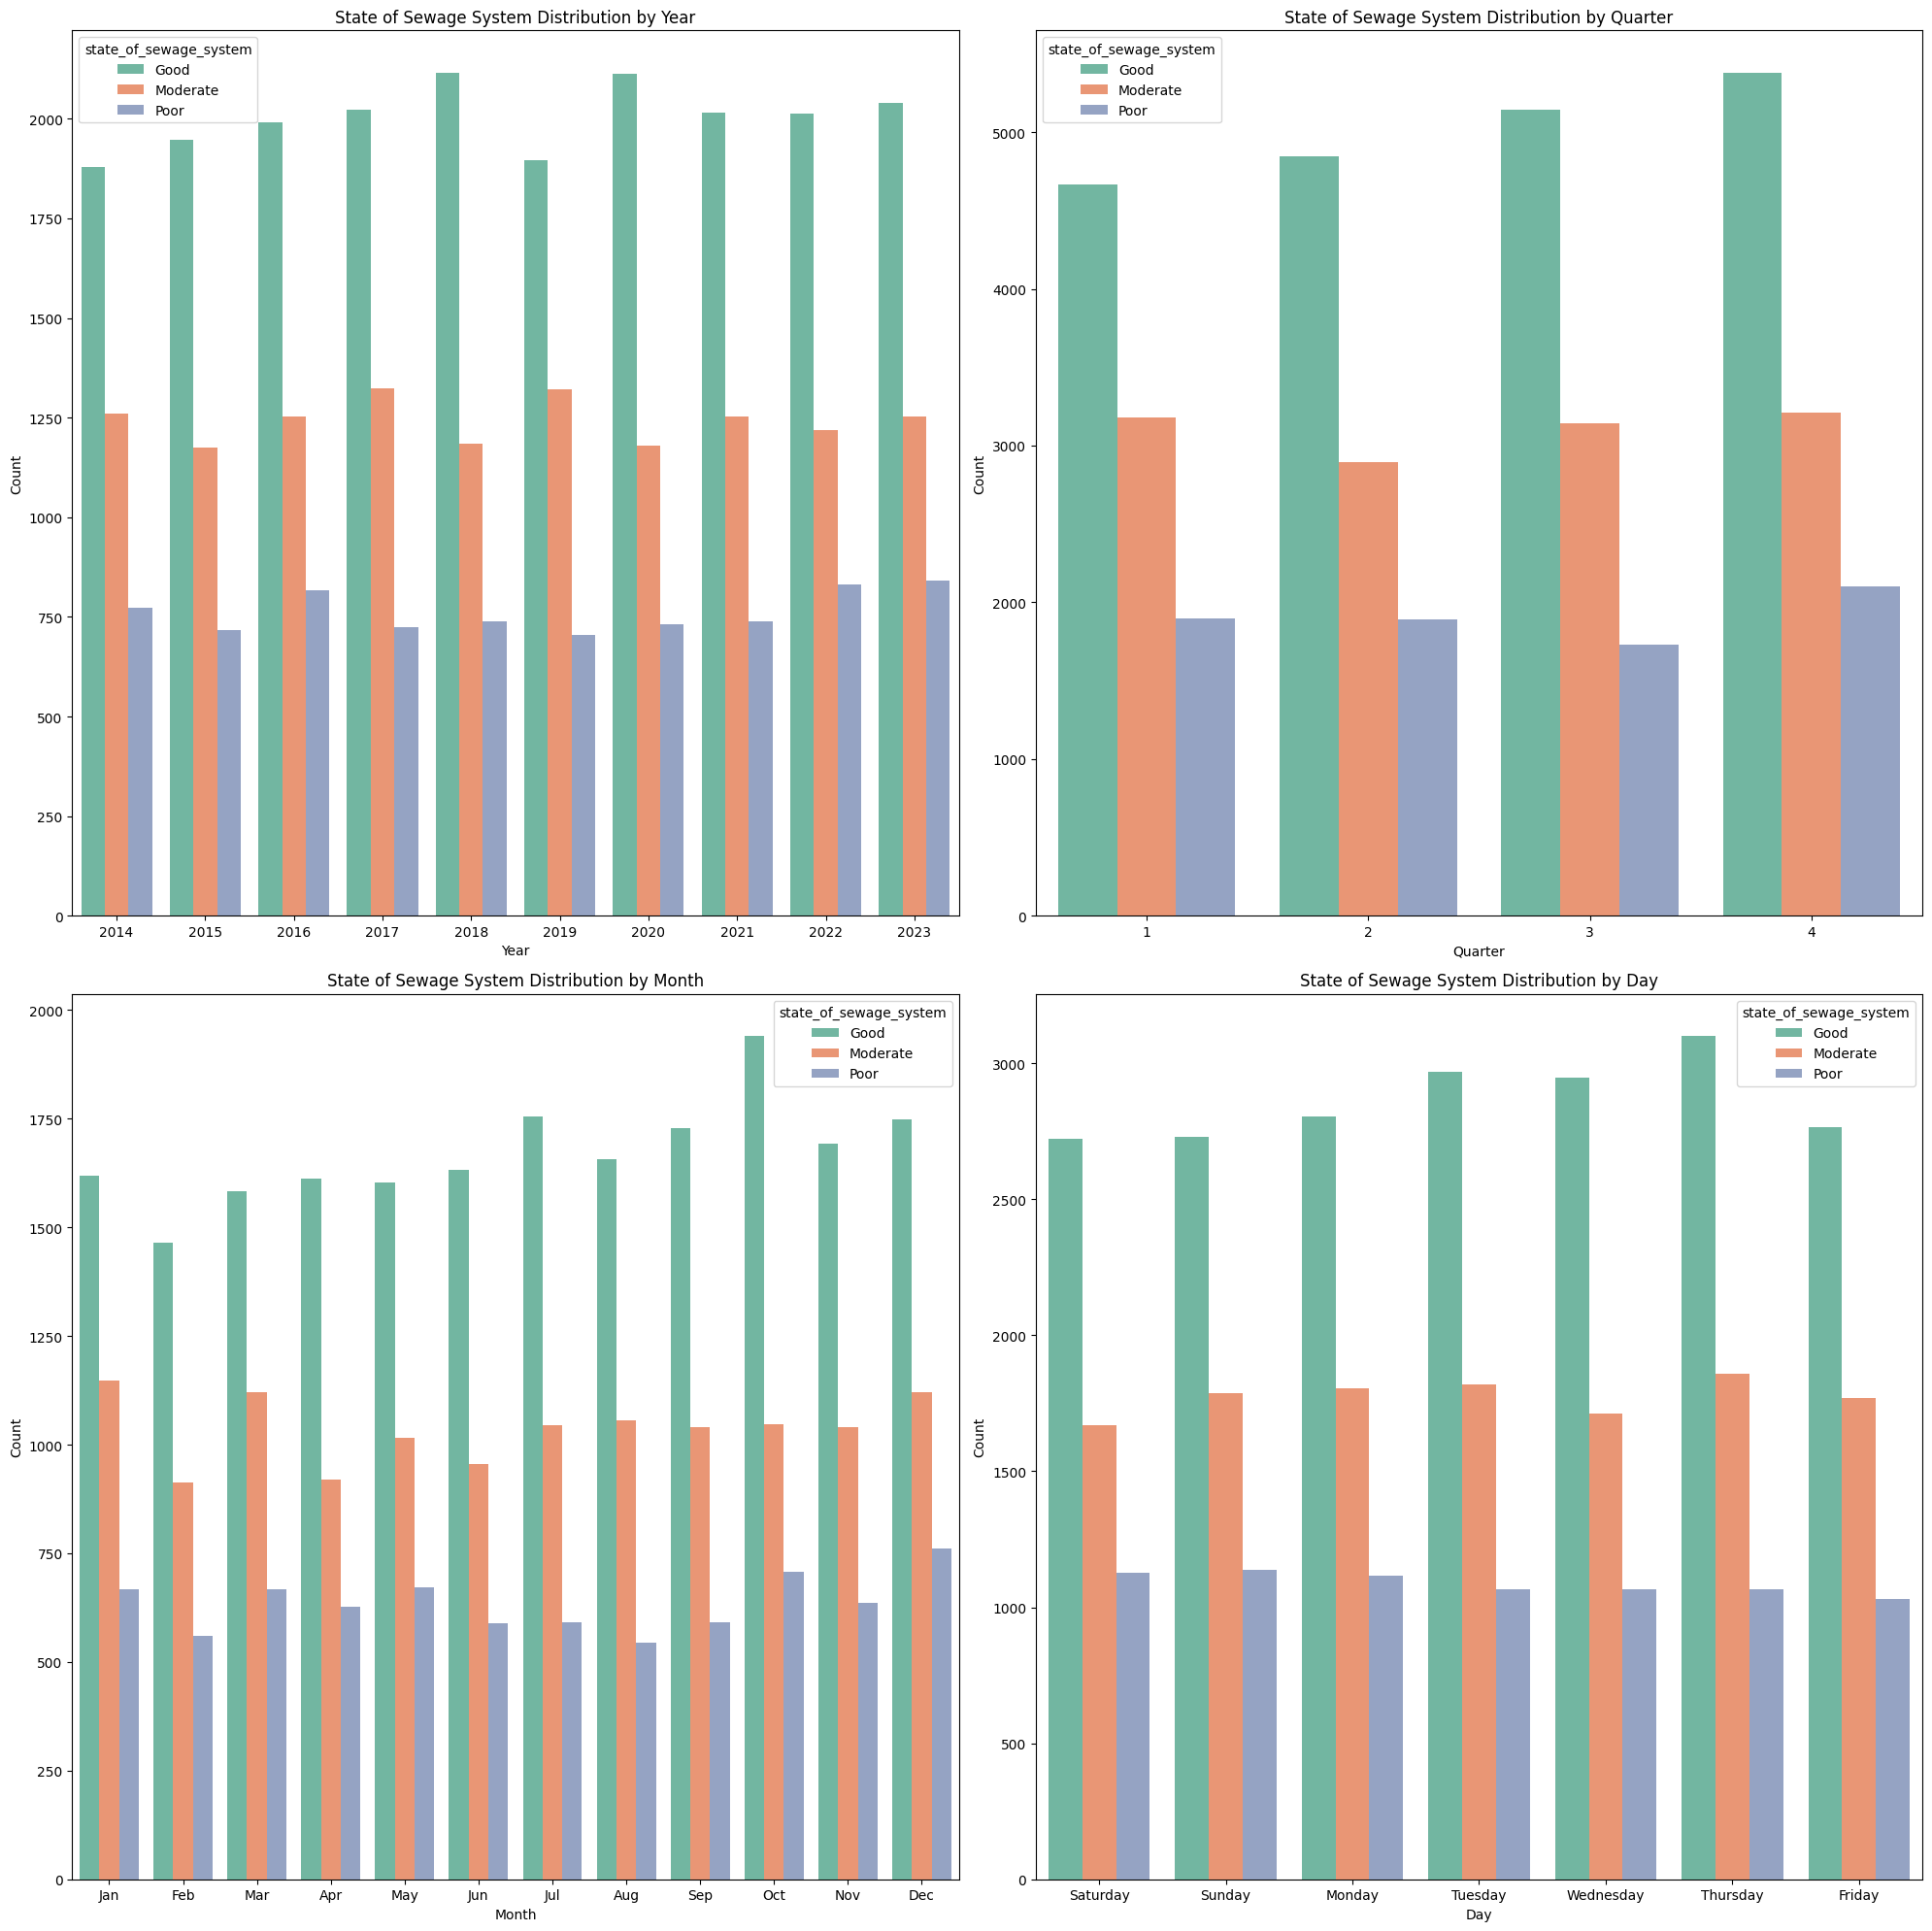

In [50]:
# Code After removing year 2024
# Set up the 2x2 grid for the subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Yearly Distribution
sns.countplot(data=df_2014_2023, x='sampling_year', hue='state_of_sewage_system', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('State of Sewage System Distribution by Year')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Count')

# Quarterly Distribution
sns.countplot(data=df_2014_2023, x='sampling_quarter', hue='state_of_sewage_system', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('State of Sewage System Distribution by Quarter')
axes[0, 1].set_xlabel('Quarter')
axes[0, 1].set_ylabel('Count')

# Monthly Distribution
sns.countplot(data=df_2014_2023, x='sampling_month', hue='state_of_sewage_system', ax=axes[1, 0], palette='Set2', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1, 0].set_title('State of Sewage System Distribution by Month')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Count')

# Daily Distribution
sns.countplot(data=df_2014_2023, x='sampling_day', hue='state_of_sewage_system', ax=axes[1, 1], palette='Set2', order=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
axes[1, 1].set_title('State of Sewage System Distribution by Day')
axes[1, 1].set_xlabel('Day')
axes[1, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
# Move legend outside the plot (outside the right side)
plt.show()
# the state of sewage system is almost the same in every year, but there was an increase in 2023 over 2022
# the last quarter in the years shows the highest poor sewage system states
# October has highest sewage system state, but december has the poorest
# The sewage system state is best at thursdays, but poorest on Sundays

In [51]:
df.columns

Index(['latitude', 'longitude', 'sampling_date', 'nitrogen_(mg/L)',
       'phosphorus_(mg/L)', 'state_of_sewage_system', 'sampling_year',
       'sampling_quarter', 'sampling_month', 'sampling_day'],
      dtype='object')

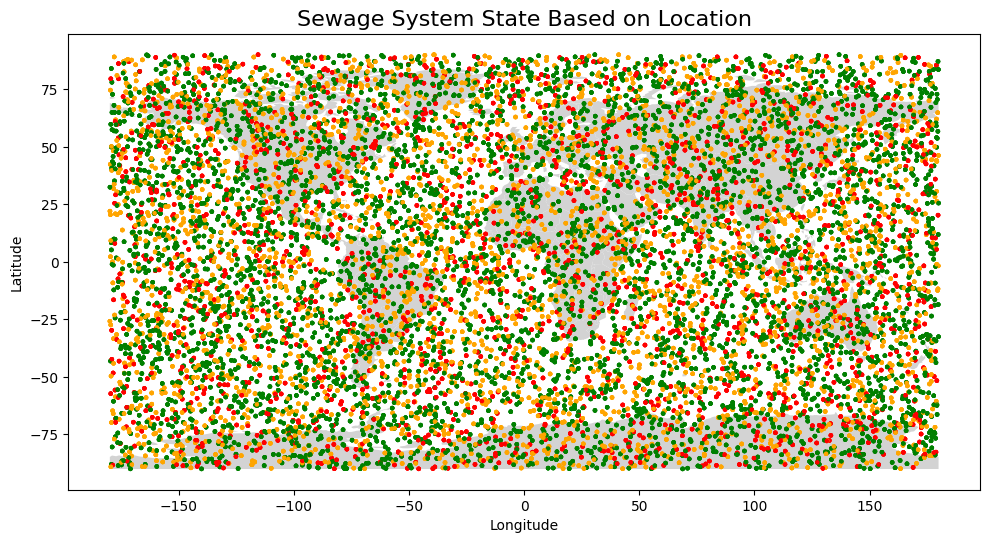

In [52]:
# Convert latitude and longitude to a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Color mapping based on sewage system state
color_map = {'Poor': 'red', 'Moderate': 'orange', 'Good': 'green'}

# Create a column for the colors in the GeoDataFrame
gdf['color'] = gdf['state_of_sewage_system'].map(color_map).fillna('gray')  # Fills NaN with 'gray'

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the world map (or region-specific map if you have one)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey')

# Plot the sewage system points with the correct colors
gdf.plot(ax=ax, marker='o', color=gdf['color'], markersize=5)

# Title and labels
plt.title('Sewage System State Based on Location', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.tight_layout()
plt.show()